<a href="https://colab.research.google.com/github/DeepaliJosh/Revenue-Classification-from-Online-Shopper-s-Intentions/blob/main/Online_Shoppers_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Revenue Classification from Online Shopper's Intentions**

---



#About the Dataset:
**Dataset Description:**

The dataset comprises feature vectors from 12,330 individual browsing sessions, each representing a unique user session within a one-year period. This design ensures a broad and diverse dataset, avoiding biases related to specific campaigns, special days, user profiles, or time periods.

**Content:**
- The dataset includes a total of 10 numerical and 8 categorical attributes.
- The target variable, 'Revenue,' serves as the class label, indicating whether a purchase was made during the session.

**Numerical Attributes:**
1. **Administrative:** The number of visits to administrative pages during the session.
2. **Administrative Duration:** The total time spent on administrative pages during the session.
3. **Informational:** The number of visits to informational pages during the session.
4. **Informational Duration:** The total time spent on informational pages during the session.
5. **Product Related:** The number of visits to product-related pages during the session.
6. **Product Related Duration:** The total time spent on product-related pages during the session.
7. **Bounce Rate:** The percentage of visitors who enter a page and leave without further interaction.
8. **Exit Rate:** The percentage of pageviews that were the last in a session.
9. **Page Value:** The average value of web pages visited before completing an e-commerce transaction.
10. **Special Day:** Indicates the proximity of the visit to specific special days (e.g., holidays) and their impact on session finalization.

**Categorical Attributes:**
1. **Operating System:** The user's operating system.
2. **Browser:** The web browser used by the visitor.
3. **Region:** The geographic region of the visitor.
4. **Traffic Type:** The type of internet traffic used.
5. **Visitor Type:** Indicates whether the visitor is a returning or new visitor.
6. **Weekend:** A Boolean value indicating whether the visit occurred on a weekend.
7. **Month:** The month of the year when the session took place.

#**Objective:**
The primary objective of this dataset is to analyze and identify the most influential factors in predicting a shopper's behavior and provide recommendations for improving performance. The 'Revenue' attribute is the focal point, as it signifies whether a purchase was made during a session.

**Importing the required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import  XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score, roc_curve, roc_auc_score, auc

In [2]:
shop= pd.read_csv("/content/online_shoppers_intention.csv")

In [3]:
#checking the first 5 rows
shop.head(5)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

**Administrative_Duration -Integer**

Time spent on Administrative pages in seconds
    
    0 – No time was spent on the page
    1 - Less time of under 233 was spent on the page
    2 – More time of  over 233 was spent on the page

**Informational_duration Integer**

Time spent on Informational pages in seconds

    0 – No time was spent on the page
    1- More time was spent on the page

**ProductRelated_Duration Integer**

Time spent on pages related to products in seconds
                                      
    0 – No time was spent on the page
    1 - Less time of under 3384 was spent on the page
    2 – More time of  over 3384 was spent on the page

**Browse**- Integer -ID of bowsers from which the session took place

**Region** - Integer - ID of Regions from which the session took place

**Traffic Type** -Integer - ID of different types of sources from which the users landed on the website

**User Type** -String - Whether the user is a returning user or a new user or of any other type

**Revenue** - Boolean - Whether the user contributed to the revenue by purchasing or not

**Weekend** - Boolean - Whether the session was on a weekend or not

**Special Day** - This feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

In [4]:
#checking the names of the column in the dataset
shop.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
shop.shape

(12330, 18)

In [6]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Checking the descriptive statistics summary**

In [7]:
shop.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

**Checking the number of Missing Values**

In [8]:
shop.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


There are no null values.

#Exploratory Data Analysis

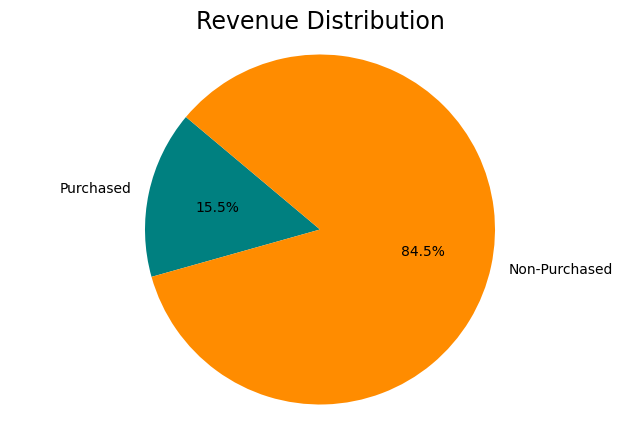

In [9]:

import matplotlib.pyplot as plt

# Calculate the count of 'Revenue' values
revenue = shop['Revenue'].value_counts()

# Define labels and values for the pie chart
labels = ['Purchased', 'Non-Purchased']
values = [revenue[True], revenue[False]]

# Define colors for the pie chart
colors = ['#008080', '#FF8C00']

# Create a pie chart
plt.figure(figsize=(8, 5))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution', fontsize=17)

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



**Revenue - Boolean - Whether the user contributed to the revenue by purchasing or not**

According to the dataset we have 8 categorical variables and 10 numerical variables. Lets, explore the categorical variable

**Exploring the categorical variables**

In [10]:
# Here we change Opearting system value from numerical to caterogical
# Data is take from Google.
shop.loc[shop['OperatingSystems'] == 1,'OperatingSystems'] = 'IOS'
shop.loc[shop['OperatingSystems'] == 2,'OperatingSystems'] = 'Android Mobile'
shop.loc[shop['OperatingSystems'] == 3,'OperatingSystems'] = 'Windows'
shop.loc[shop['OperatingSystems'] == 4,'OperatingSystems'] = 'Linux'
shop.loc[shop['OperatingSystems'] == 5,'OperatingSystems'] = 'MS-DOS'
shop.loc[shop['OperatingSystems'] == 6,'OperatingSystems'] = 'Fedora'
shop.loc[shop['OperatingSystems'] == 7,'OperatingSystems'] = 'Ubuntu'
shop.loc[shop['OperatingSystems'] == 8,'OperatingSystems'] ='Solaris'

In [11]:
shop['OperatingSystems'].value_counts()

Android Mobile    6601
IOS               2585
Windows           2555
Linux              478
Solaris             79
Fedora              19
Ubuntu               7
MS-DOS               6
Name: OperatingSystems, dtype: int64

In [12]:
# Here we change Browser value from numerical to caterogical
# Data is take from Google. Top 10 list of browser.
shop.loc[shop['Browser'] == 1,'Browser'] = 'Firefox'
shop.loc[shop['Browser'] == 2,'Browser'] = 'Google Chrome'
shop.loc[shop['Browser'] == 3,'Browser'] = 'Microsoft Edge'
shop.loc[shop['Browser'] == 4,'Browser'] = 'Apple Safari'
shop.loc[shop['Browser'] == 5,'Browser'] = 'Opera'
shop.loc[shop['Browser'] == 6,'Browser'] = 'Brave'
shop.loc[shop['Browser'] == 7,'Browser'] = 'UCBrowser'
shop.loc[shop['Browser'] == 8,'Browser'] = 'DuckDuckgo'
shop.loc[shop['Browser'] == 9,'Browser'] = 'Chromium'
shop.loc[shop['Browser'] == 10,'Browser'] = 'Epic'
shop.loc[shop['Browser'] == 11,'Browser'] = 'Internet Explorer'
shop.loc[shop['Browser'] == 12,'Browser'] = 'Tor Browser'
shop.loc[shop['Browser'] == 13,'Browser'] = 'Maxthon'

In [13]:
shop['Browser'].value_counts()

Google Chrome        7961
Firefox              2462
Apple Safari          736
Opera                 467
Brave                 174
Epic                  163
DuckDuckgo            135
Microsoft Edge        105
Maxthon                61
UCBrowser              49
Tor Browser            10
Internet Explorer       6
Chromium                1
Name: Browser, dtype: int64

In [14]:
# Here we change Region value from numerical to caterogical
# Data is take from Google. Top 10 country where internet is used most.
shop.loc[shop['Region'] == 1,'Region'] = 'China'
shop.loc[shop['Region'] == 2,'Region'] = 'Indonesia'
shop.loc[shop['Region'] == 3,'Region'] = 'India'
shop.loc[shop['Region'] == 4,'Region'] = 'United States'
shop.loc[shop['Region'] == 5,'Region'] = 'Brazil'
shop.loc[shop['Region'] == 6,'Region'] = 'Nigeria'
shop.loc[shop['Region'] == 7,'Region'] = 'Japan'
shop.loc[shop['Region'] == 8,'Region'] = 'Russia'
shop.loc[shop['Region'] == 9,'Region'] = 'Bangladesh'

In [15]:
shop['Region'].value_counts()

China            4780
India            2403
United States    1182
Indonesia        1136
Nigeria           805
Japan             761
Bangladesh        511
Russia            434
Brazil            318
Name: Region, dtype: int64

In [16]:
shop['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [17]:
os_labels=['Android Mobile','IO','Windows','Linux','Solaris','Fedora','Ubuntu','MS-DOS']
os_values=[6601,2585,2555,478,79,19,7,6]

fig = go.Figure(data=[go.Pie(labels=os_labels,
                             values=os_values,title='Percentage of Diffrent OS Used by visitors')])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()



*   Android Mobile is the most commonly used operating system among visitors.

*   IO is the second most used operating system.
*   Windows ranks third in terms of usage.


*  Linux, Solaris, Fedora, Ubuntu, and MS-DOS are used less frequently, with MS-DOS being the least commonly used among visitors.




In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_countplot(data, x_column, hue_column, palette, title, x_label, y_label):
    # Create a countplot with Seaborn using the provided arguments
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=x_column, hue=hue_column, palette=palette)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Rotate x-axis labels vertically
    plt.xticks(rotation=90)

    # Show the Seaborn countplot
    plt.show()


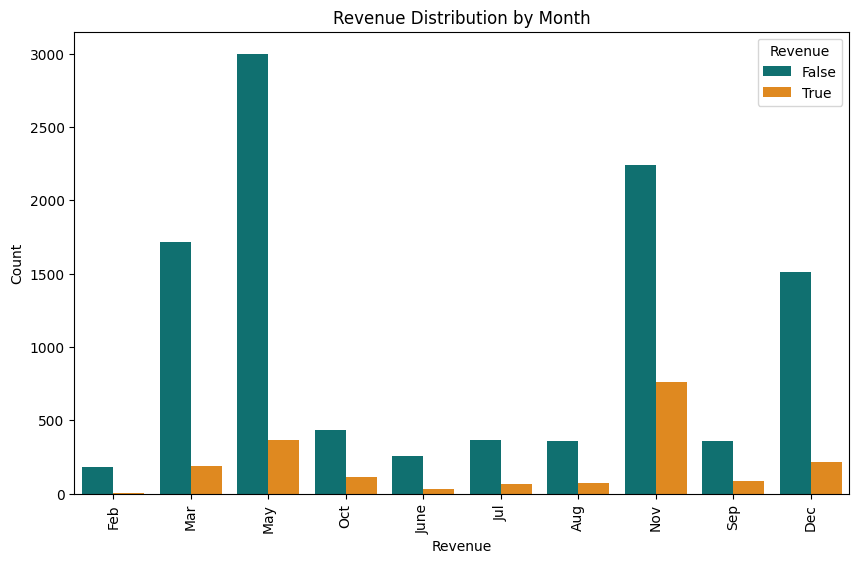

In [19]:
create_countplot(
    data=shop,
    x_column='Month',
    hue_column='Revenue',
    palette=['#008080', '#FF8C00'],
    title='Revenue Distribution by Month',
    x_label='Revenue',
    y_label='Count'
)

1. November shows the highest number of contributors to the revenue, indicating that more people made purchases during this month compared to other months.

2. May has the highest number of visitors who did not contribute to the revenue by making purchases. This suggests that despite a significant number of visitors, they did not make any transactions to generate revenue during this month.

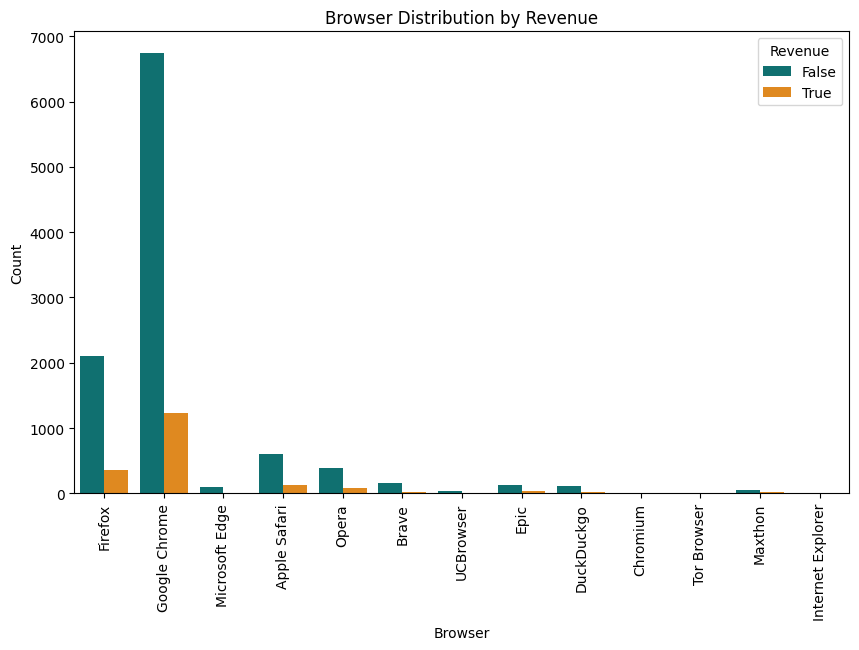

In [20]:
#  Browser vs. Revenue
create_countplot(
    data=shop,
    x_column='Browser',
    hue_column='Revenue',
    palette=['#008080', '#FF8C00'],
    title='Browser Distribution by Revenue',
    x_label='Browser',
    y_label='Count'
)




*   Google Chrome, with the highest user count, generates the maximum revenue among all browsers.

*  Firefox, the second most widely used browser, follows with a substantial revenue contribution.


*   Apple Safari, while having a smaller user base, still contributes significantly to revenue.
*   So, to maximize revenue, so we can focus on optimizing the user experience for Google Chrome and Firefox, the leading revenue generators, while also implementing strategies to engage and retain users of browsers like Apple Safari, acknowledging their significant revenue contribution.




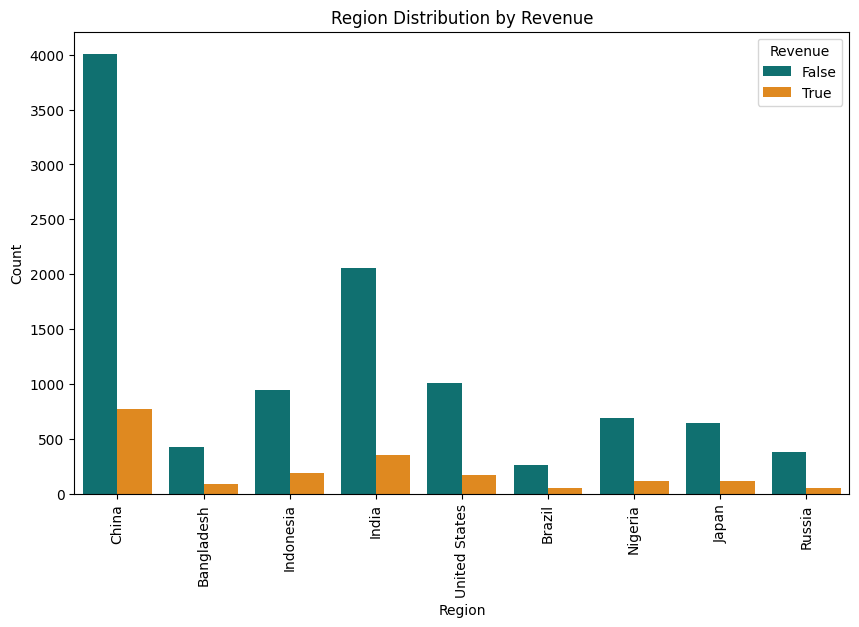

In [21]:
create_countplot(
    data=shop,
    x_column='Region',
    hue_column='Revenue',
    palette=['#008080', '#FF8C00'],
    title='Region Distribution by Revenue',
    x_label='Region',
    y_label='Count'
)

Region - Integer - ID of Regions from which the session took place

Revenue - Boolean - Whether the user contributed to the revenue by purchasing or not

China has highest purchases and the highest non purchases count as well

India has the second highest number of purchases and non purchases count as well.

Brazil has the least number of purchases and non purchases compared to other regions.

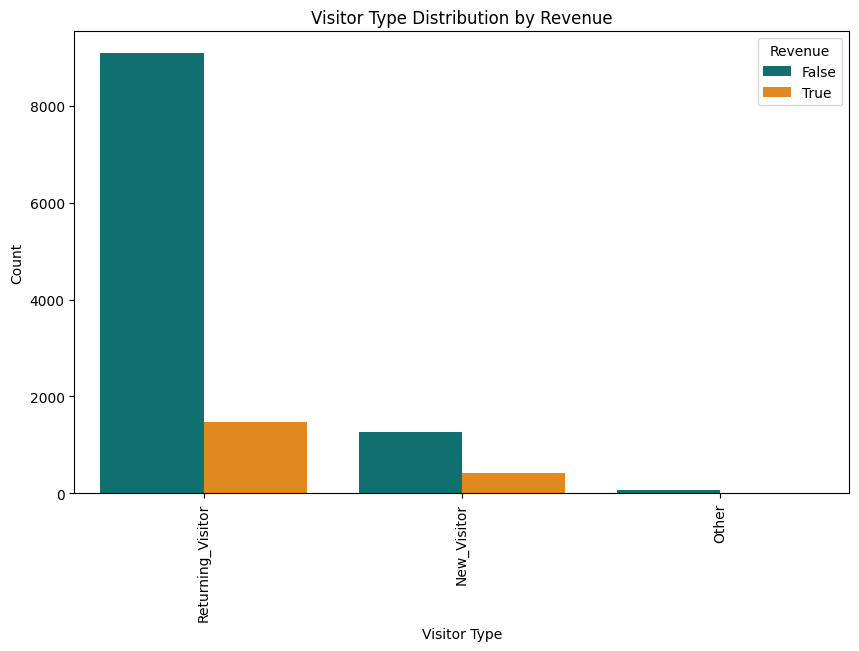

In [22]:
create_countplot(
    data=shop,
    x_column='VisitorType',
    hue_column='Revenue',
    palette=['#008080', '#FF8C00'],
    title='Visitor Type Distribution by Revenue',
    x_label='Visitor Type',
    y_label='Count'
)

From the above count plot we can infer that Returning Visitors have the highest Revenue Count then compared to New_Visitors.

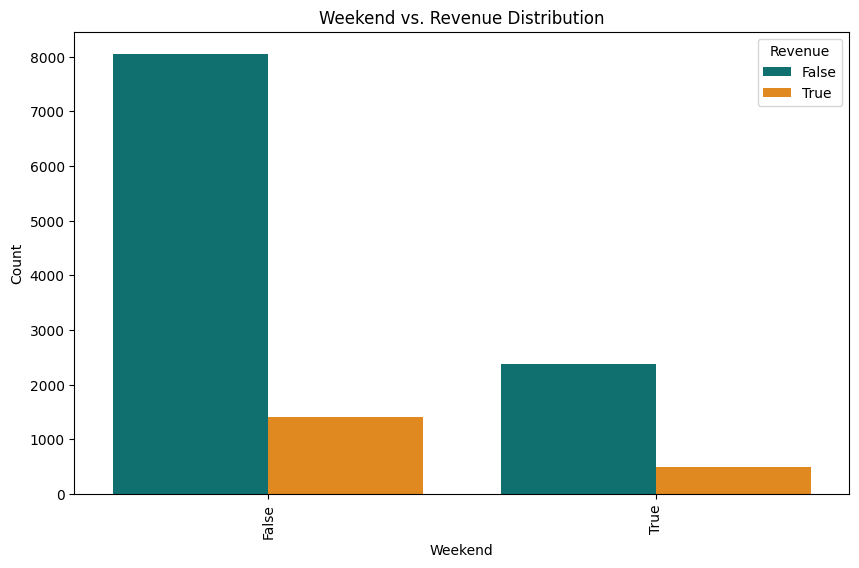

In [23]:
create_countplot(
    data=shop,
    x_column='Weekend',
    hue_column='Revenue',
    palette=['#008080', '#FF8C00'],
    title='Weekend vs. Revenue Distribution',
    x_label='Weekend',
    y_label='Count'
)



*  Weekdays witness more substantial revenue generation compared to weekends.
*    Revenue generation is lower during weekends.





1. **Purpose of "Special Day" Feature:** The "Special Day" feature serves the purpose of identifying significant special days when people tend to make more purchases, like Valentine's Day or Mother's Day.

2. **Closeness Measurement:** It measures how close a visitor's website visit is to these special days, helping us understand the timing of visits in relation to these occasions.

3. **Signal-Like Value:** The "Special Day" value acts like a signal or indicator, with variations based on the proximity to a special day. It's not zero when a significant day is approaching.

4. **Timing Insight:** For example, if we consider Valentine's Day, the signal gradually increases from February 2nd to February 12th, peaking around February 8th. This indicates that people are most likely to make Valentine's Day-related purchases during this period, offering insights into visit timing concerning special events.

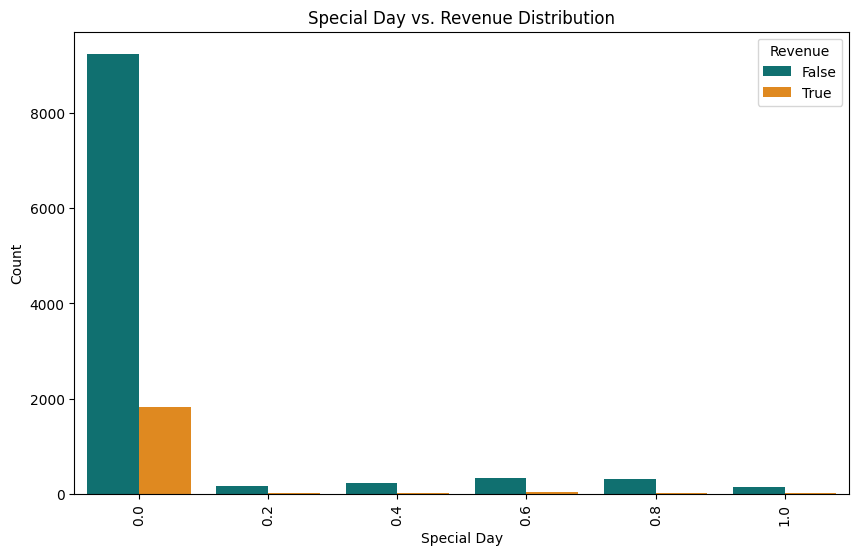

In [24]:
create_countplot(
    data=shop,
    x_column='SpecialDay',
    hue_column='Revenue',
    palette=['#008080', '#FF8C00'],
    title='Special Day vs. Revenue Distribution',
    x_label='Special Day',
    y_label='Count'
)

We can see that the "Special Day" feature has a limited impact on revenue generation. Most of the revenue is generated when the "Special Day" value is 0.0, indicating that it's not significantly influenced by special occasions.

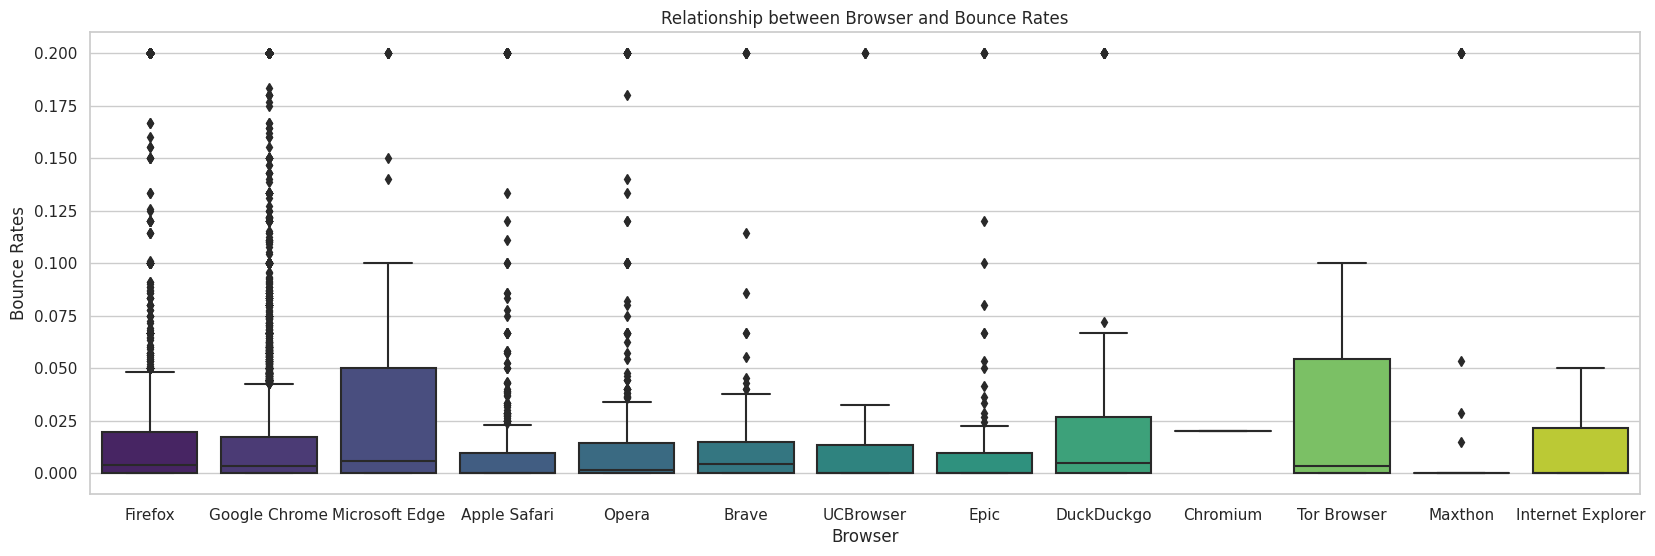

In [25]:
plt.figure(figsize=(20, 6))
sns.set(style="whitegrid")

sns.boxplot(data=shop, x='Browser', y='BounceRates',palette='viridis')
# or sns.violinplot(), sns.barplot(), sns.pointplot(), sns.stripplot(), etc.

# Add titles and labels
plt.title('Relationship between Browser and Bounce Rates')
plt.xlabel('Browser')
plt.ylabel('Bounce Rates')

# Show the plot
plt.show()



*   Bounce rates vary among different web browsers, with some browsers having a wider range of bounce rates than others.

*   Outliers are present in several browser categories, indicating unusually high or low bounce rates for specific instances.

*   Overall, the distribution of bounce rates across browsers suggests varying user engagement and interaction patterns.






**Exploring Continuous Variables**

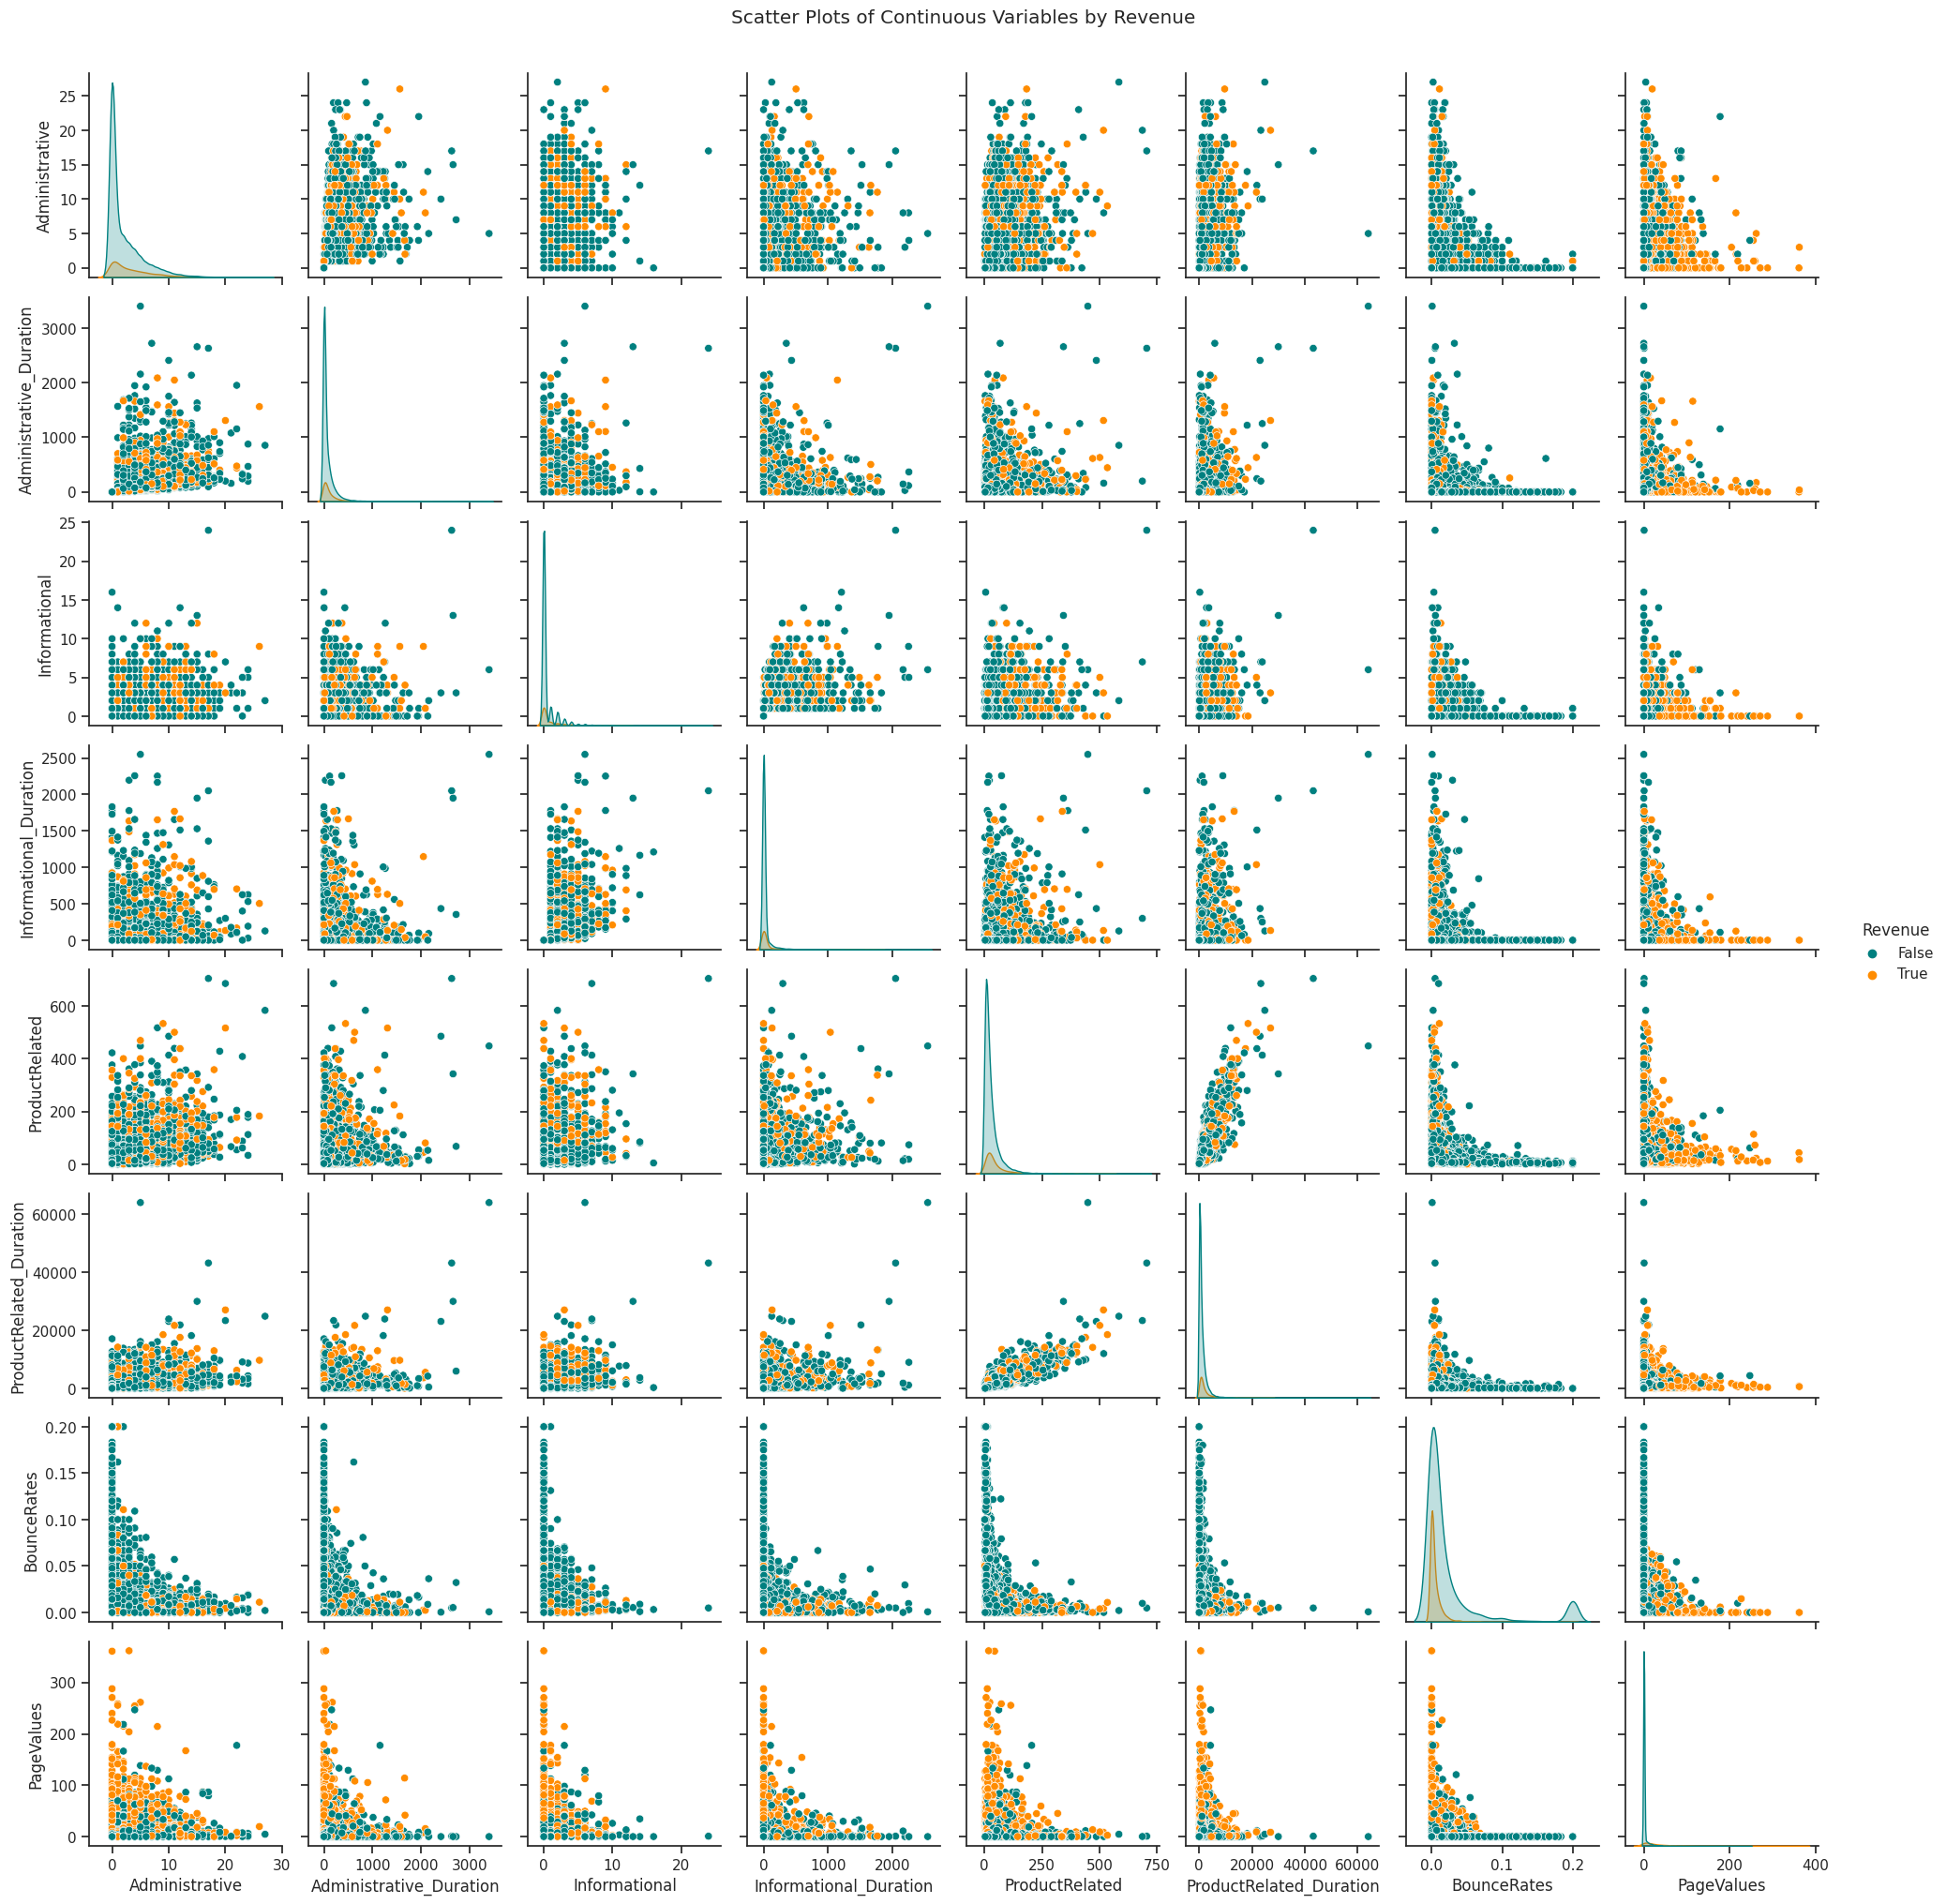

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the continuous variables and add 'Revenue' for hue
continuous_variables = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'PageValues', 'Revenue'
]

# Create a pair plot of scatter plots
sns.set(style="ticks")
sns.pairplot(data=shop[continuous_variables], hue='Revenue', palette=['#008080', '#FF8C00'])

# Add a title
plt.suptitle('Scatter Plots of Continuous Variables by Revenue', y=1.02)

# Show the pair plot
plt.show()


The scatter plots of continuous variables by revenue reveal right-skewed distributions, a positive correlation between 'ProductRelated' and 'ProductRelated_Duration,' but no clear demarcation between revenue generated and not generated.

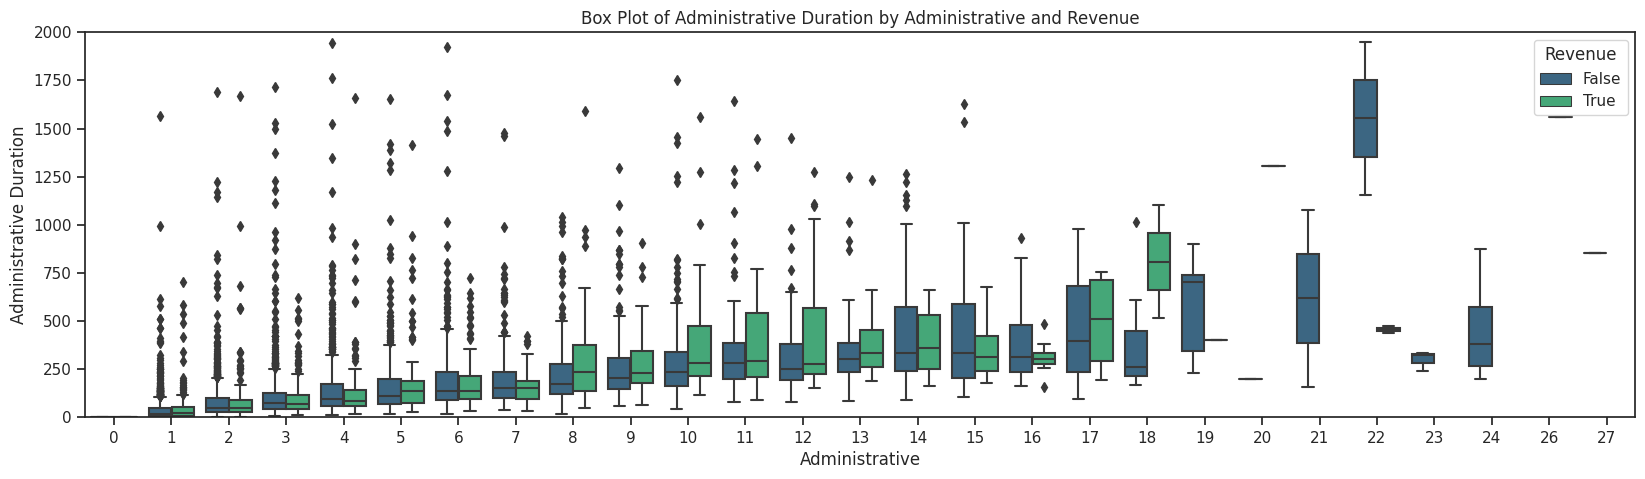

In [27]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='Administrative', y='Administrative_Duration', hue='Revenue', data=shop, palette='viridis')
plt.ylim(0, 2000)  # Adjust the y-axis limits to your desired range
plt.title('Box Plot of Administrative Duration by Administrative and Revenue')
plt.xlabel('Administrative')
plt.ylabel('Administrative Duration')
plt.show()





*   When the number of Administrative pages visited is more than 19, there is typically no revenue earned.
*  For visitors who viewed fewer than 7 Administrative pages, they tend not to spend much time on these pages, indicating a lack of engagement in making a deal.

*   In contrast, when the number of Administrative pages visited falls in the range of 8 to 18, people tend to spend more time exploring the Administrative pages, suggesting greater interest and engagement in the content, potentially for the purpose of making a deal.






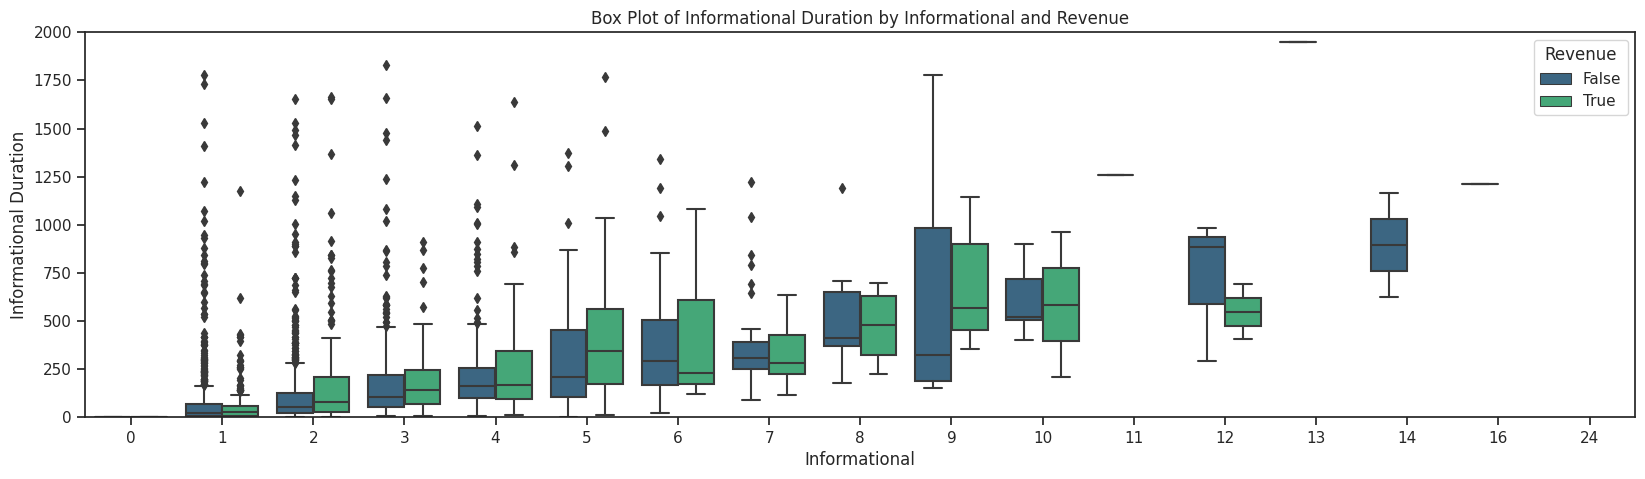

In [28]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='Informational', y='Informational_Duration', hue='Revenue', data=shop, palette='viridis')
plt.ylim(0, 2000)  # Adjust the y-axis limits to your desired range
plt.title('Box Plot of Informational Duration by Informational and Revenue')
plt.xlabel('Informational')
plt.ylabel('Informational Duration')
plt.show()




*   People usually spend more time on reading Information related page to make a deal.
*   When the number of Informational pages visited is more than 12, there is typically no revenue earned.

*   For visitors who viewed fewer than 4 Informational pages, they tend not to spend much time on these pages, indicating a lack of engagement in making a deal.
*  In contrast, when the number of Informational pages visited falls in the range of 5 to 10, people tend to spend more time exploring the Informational pages, suggesting greater interest and engagement in the content, potentially for the purpose of making a deal.










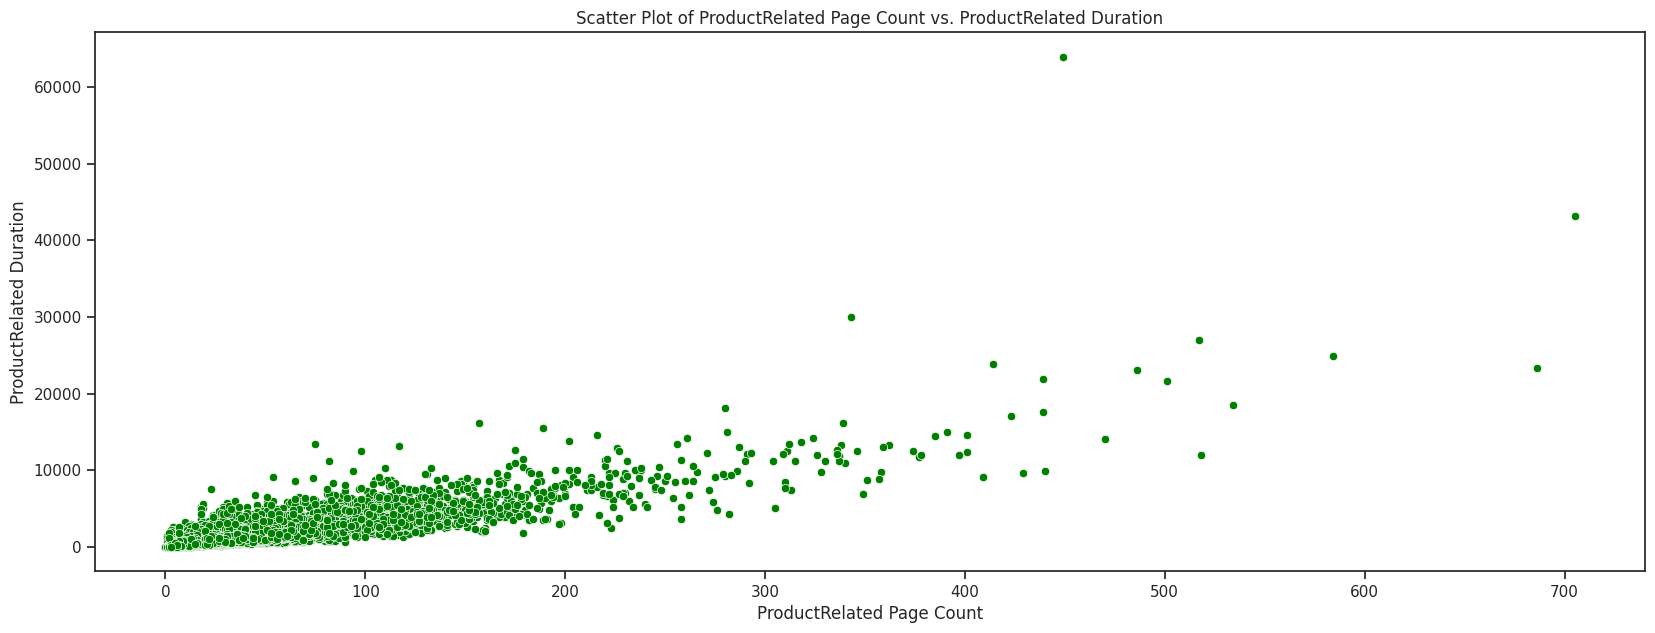

In [29]:

plt.figure(figsize=(20, 7))
sns.scatterplot(x='ProductRelated', y='ProductRelated_Duration', data=shop, color='green')
plt.xlabel('ProductRelated Page Count')
plt.ylabel('ProductRelated Duration')
plt.title('Scatter Plot of ProductRelated Page Count vs. ProductRelated Duration')
plt.show()

**People generally visit and spend much time on Product related page than Administrative or Information Related Pages.**

Text(0, 0.5, 'Mean Time Spent')

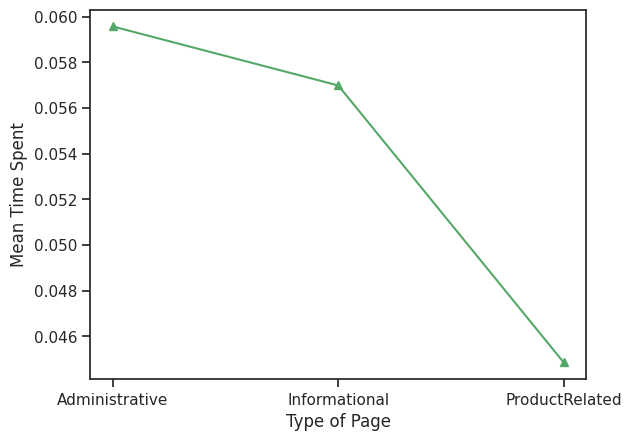

In [30]:
adm=np.mean((shop['Administrative']/shop['Administrative_Duration']).replace(np.inf,np.nan).dropna())
inm=np.mean((shop['Informational']/shop['Informational_Duration']).replace(np.inf,np.nan).dropna())
prm=np.mean((shop['ProductRelated']/shop['ProductRelated_Duration']).replace(np.inf,np.nan).dropna())
pagm=pd.Series([adm,inm,prm],index=['Administrative','Informational','ProductRelated'])
plt.plot(pagm.index,pagm.values,'-^g')
plt.xlabel('Type of Page')
plt.ylabel('Mean Time Spent')

Average time spend on Product Related Pages is least and max for Administrative Related Pages.

This means Product Related Pages should be short to the point and attrctive as they are skipped fast but Administrative Related Pages should be descriptive.

**Understanding the Distribution of Categorical Variables**

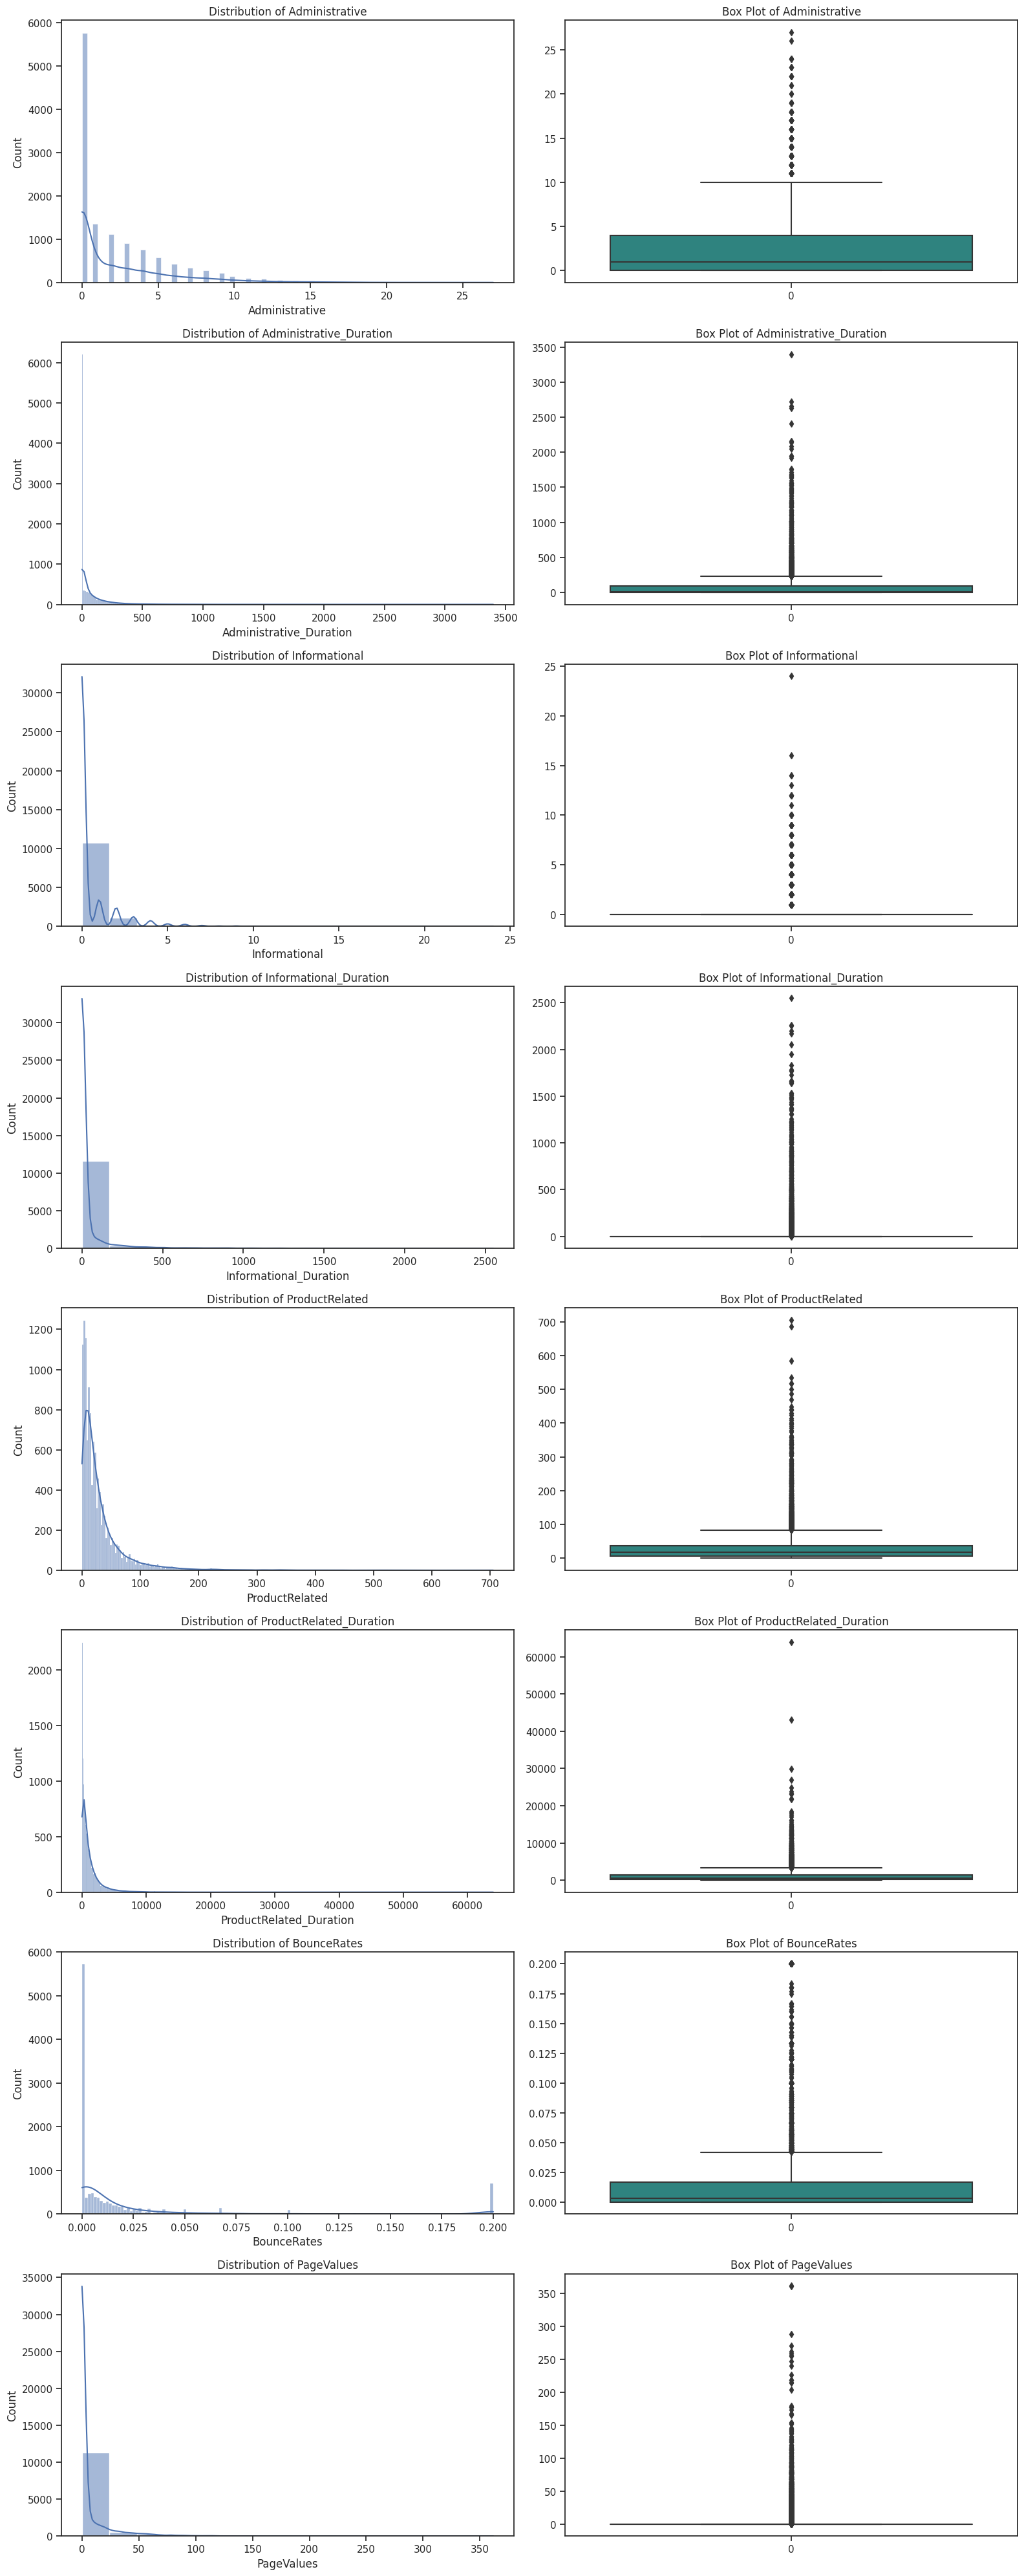

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'PageValues'
]

# Create a new figure
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(16, 5 * len(columns_to_plot)))

# Loop through each column and create subplots
for i, column in enumerate(columns_to_plot):
    # Create a distribution plot (histogram)
    sns.histplot(shop[column], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of {column}')

    # Create a box plot
    sns.boxplot(shop[column], ax=axes[i, 1],palette='viridis')
    axes[i, 1].set_title(f'Box Plot of {column}')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()



#"Addressing outliers through data transformation utilizing the Box-Cox method."

Administrative process is completed


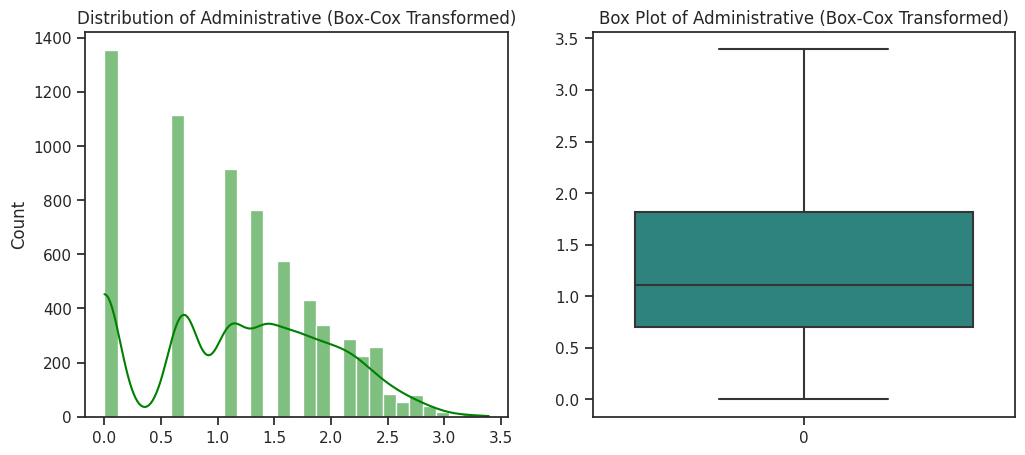

Administrative_Duration process is completed


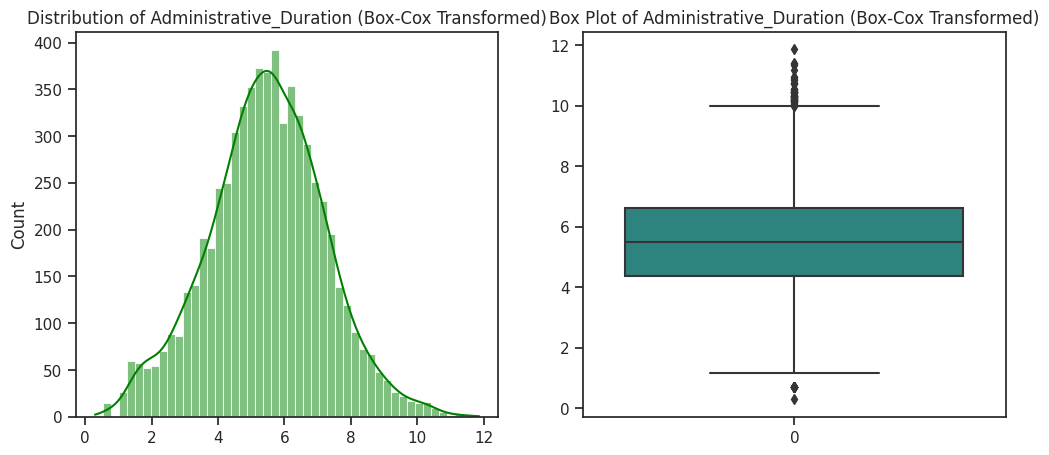

Informational process is completed


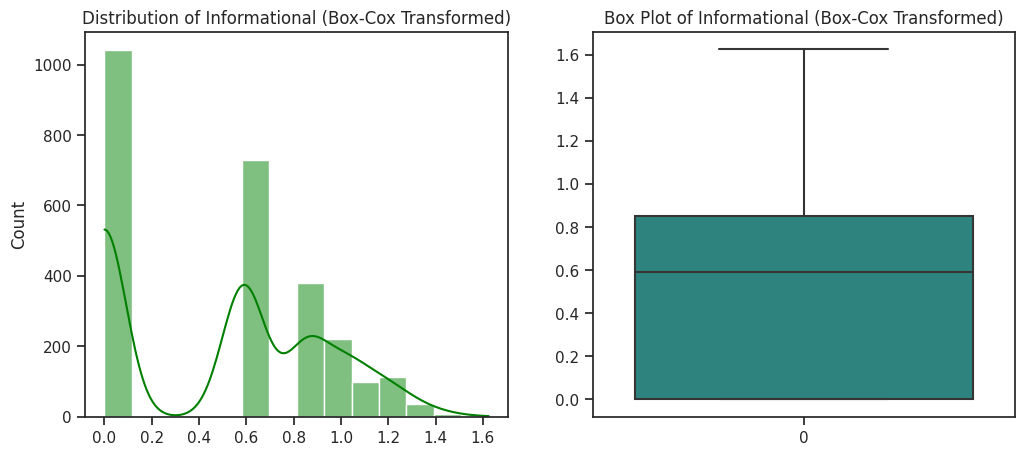

Informational_Duration process is completed


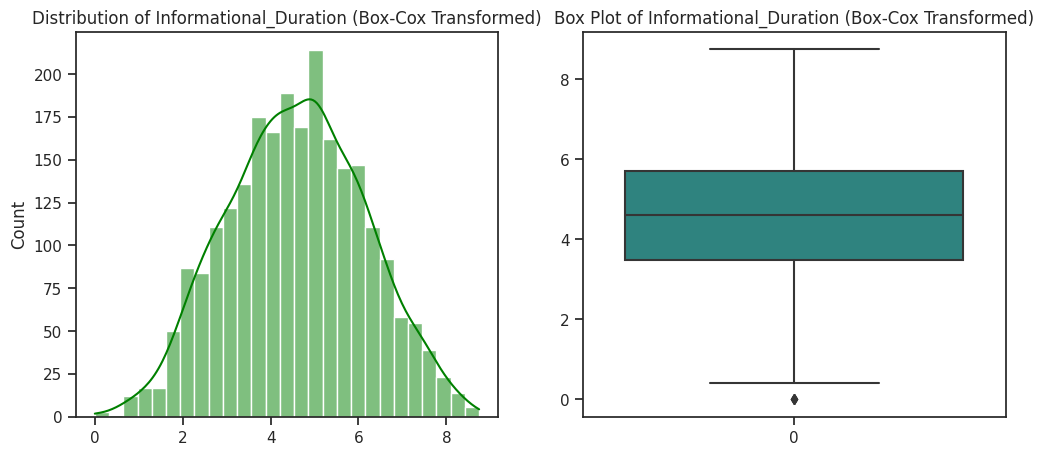

ProductRelated process is completed


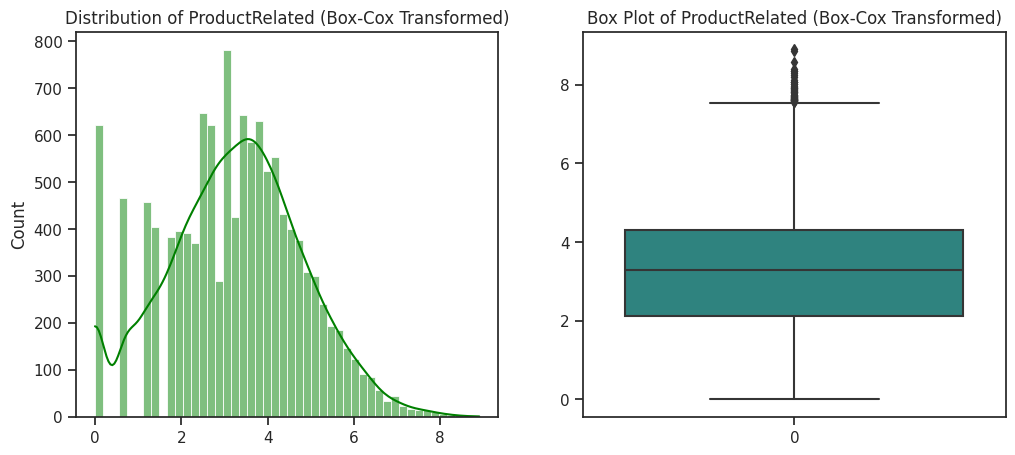

ProductRelated_Duration process is completed


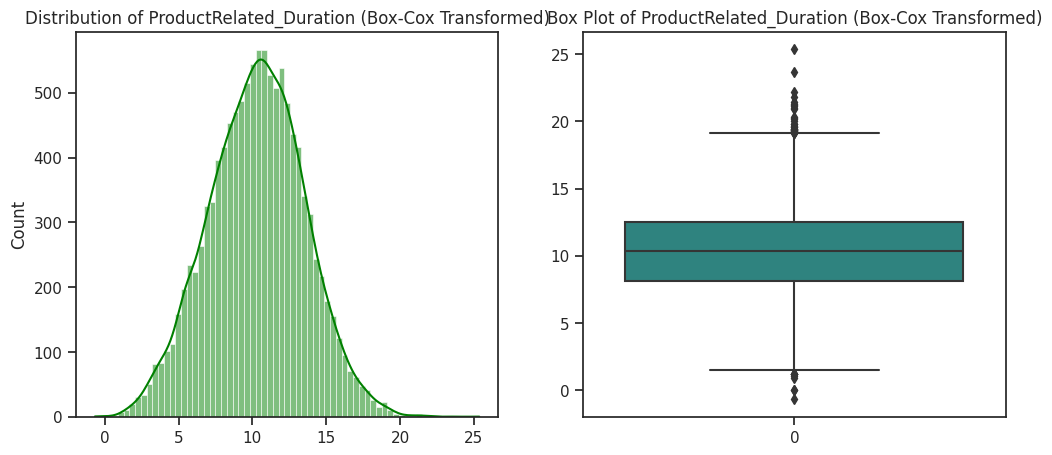

BounceRates process is completed


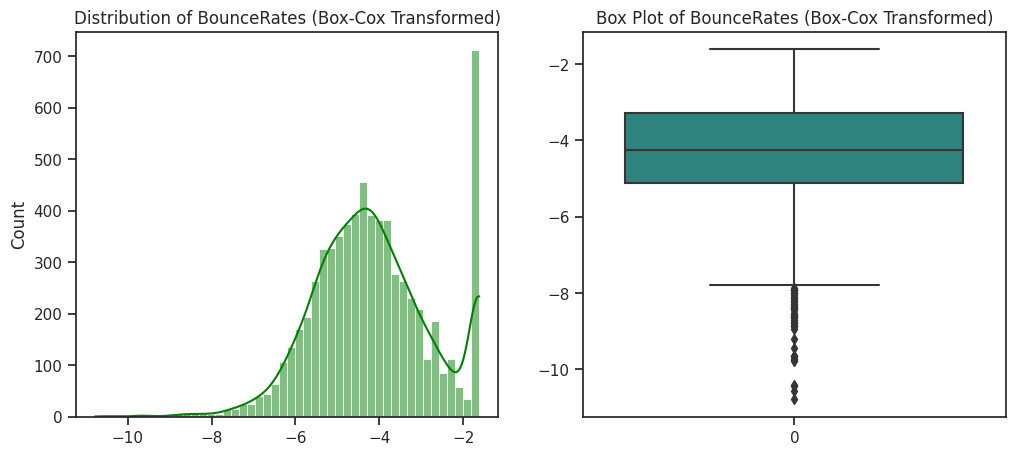

PageValues process is completed


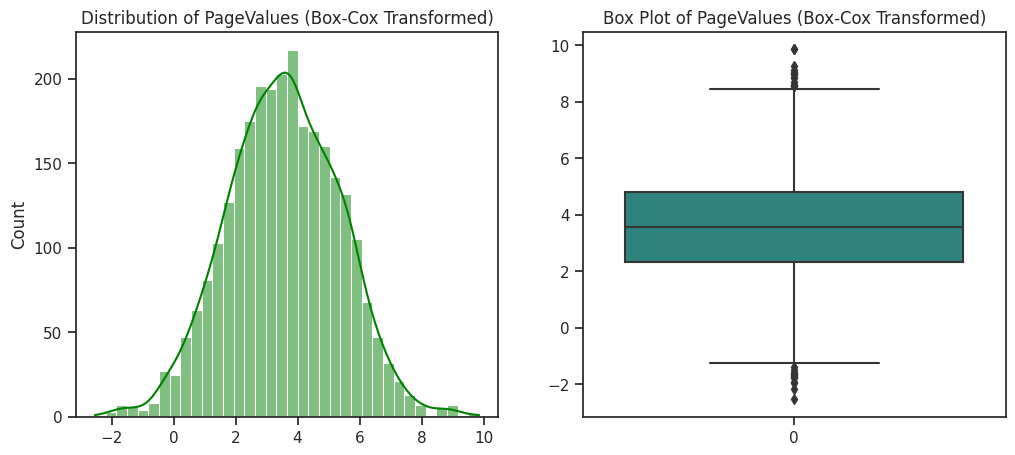

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# transform training data & save lambda value
shop_list = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'PageValues']

for col in shop_list:
    if shop[col].dtypes == 'int64' or shop[col].dtypes == 'float64':
        posdata = shop[col][shop[col] > 0]

        if len(posdata) == 0:
            print('{} has no positive values. Skipping transformation.'.format(col))
            continue

        col_data, fitted_lambda = stats.boxcox(posdata)

        # creating axes to draw plots
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        # Distribution plot
        sns.histplot(col_data, kde=True, fill=True, color="green", ax=ax[0])
        ax[0].set_title(f'Distribution of {col} (Box-Cox Transformed)')

        shop.loc[shop[col] > 0, col] = col_data
        print('{} process is completed'.format(col))

        # Box plot
        sns.boxplot(col_data, ax=ax[1],palette='viridis')
        ax[1].set_title(f'Box Plot of {col} (Box-Cox Transformed)')

        plt.show()

**Correlation Matrix**

<ipython-input-33-3719a846526e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



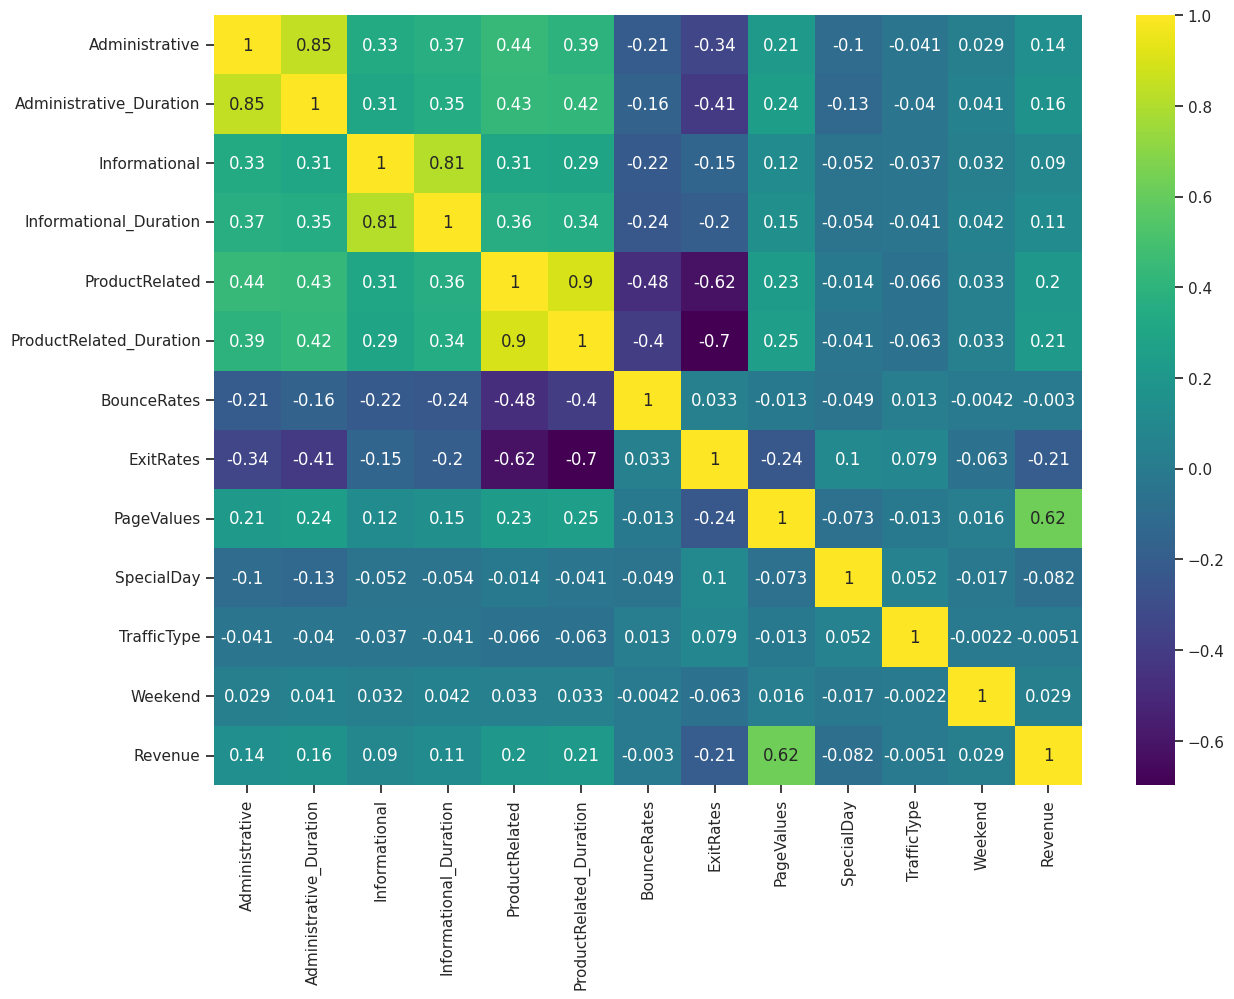

In [33]:
plt.figure(figsize=(14,10))
dfplot=sns.heatmap(shop.corr(),cmap="viridis",annot=True)


**Encoding Categorical variables using LabelEncoder**

In [34]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column
shop['OperatingSystems']= label_encoder.fit_transform(shop['OperatingSystems'])
shop['Browser']= label_encoder.fit_transform(shop['Browser'])
shop['Region']= label_encoder.fit_transform(shop['Region'])
shop['Revenue']= label_encoder.fit_transform(shop['Revenue'])
shop['Month']= label_encoder.fit_transform(shop['Month'])
shop['VisitorType']= label_encoder.fit_transform(shop['VisitorType'])
shop['Weekend']= label_encoder.fit_transform(shop['Weekend'])

In [35]:
shop['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In this dataset, it's evident that we have a data imbalance.

"Addressing data imbalance in this dataset, I found that oversampling proved to be the most effective technique. Consequently, I applied oversampling to achieve a balanced dataset."

#Oversampling Technique

In [36]:
count_class_0, count_class_1 = shop.Revenue.value_counts()
shop_class_0 = shop[shop['Revenue']==0]
shop_class_1 = shop[shop['Revenue']==1]

In [37]:
# Oversample 1-class and concat the DataFrames of both classes
shop_class_1_over = shop_class_1.sample(count_class_0, replace=True)
shop_test_over = pd.concat([shop_class_0, shop_class_1_over], axis=0)

print('Random over-sampling:')
print(shop_test_over.Revenue.value_counts())

Random over-sampling:
0    10422
1    10422
Name: Revenue, dtype: int64


**Dividing the variables into Target and Feature variables.**

In [38]:
x=shop_test_over.drop(columns=['Revenue'])

y=shop_test_over['Revenue']

In [39]:
y.value_counts()

0    10422
1    10422
Name: Revenue, dtype: int64

**Splitting the data into training and testing sets**

In [40]:
#train_test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y)

In [41]:
x_train

Administrative  Administrative_Duration  Informational  \
9030         1.403490                 4.542956       0.000000   
8506         1.109393                 6.498186       0.000000   
641          2.905656                 8.987076       0.589103   
2879         0.000000                 0.000000       0.000000   
9442         0.000000                 0.000000       0.000000   
...               ...                      ...            ...   
3894         0.000000                 0.000000       0.000000   
399          1.979903                 6.674396       1.010679   
11740        1.979903                 6.968040       0.000000   
10420        2.350283                 6.225851       0.000000   
5907         0.000000                 0.000000       0.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
9030                 0.000000        3.296114                11.973327   
8506                 0.000000        4.016462                 9.403309   
641                  4.611874        4.016462                11.409359   
2879                 0.000000        3.144579                 9.596390   
9442                 0.000000        2.426744                10.304946   
...                       ...             ...                      ...   
3894                 0.000000        5.120892                10.634391   
399                  7.092884        4.016462                11.830051   
11740                0.000000        4.101565                10.678849   
10420                4.812755        7.097305                17.305103   
5907                 0.000000        1.475431                12.616349   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
9030      0.000000   0.031818    2.238027         0.0      1   
8506      0.000000   0.008824    0.000000         0.0      1   
641      -5.465275   0.026479    0.777869         0.0      5   
2879     -4.429241   0.033333    0.000000         0.0      6   
9442      0.000000   0.022222    6.062385         0.0      7   
...            ...        ...         ...         ...    ...   
3894     -5.912685   0.011471    0.000000         0.0      6   
399      -7.188019   0.013342    3.049472         0.0      5   
11740     0.000000   0.011111    5.529991         0.0      7   
10420    -6.548221   0.004610    5.790743         0.0      7   
5907     -2.024847   0.140833    0.000000         0.0      0   

       OperatingSystems  Browser  Region  TrafficType  VisitorType  Weekend  
9030                  2        5       2            1            2        0  
8506                  0        6       2           20            2        0  
641                   2        5       3            2            2        0  
2879                  2        5       8            4            2        1  
9442                  0        6       4            2            2        0  
...                 ...      ...     ...          ...          ...      ...  
3894                  0        6       2           13            2        0  
399                   0        6       5            2            2        0  
11740                 0        6       3            2            0        0  
10420                 7        6       2            8            2        0  
5907                  2        5       2            3            2        0  

[16675 rows x 17 columns]

In [42]:
y_train.value_counts()

1    8338
0    8337
Name: Revenue, dtype: int64

#Data Modelling

In [43]:
model_names_bf = []
model_names_af = []
accuracy_list_before = []
precision_list_before = []
recall_list_before = []
f1_list_before = []
roc_auc_list_before = []
accuracy_list_after = []
precision_list_after = []
recall_list_after = []
f1_list_after = []
roc_auc_list_after = []

In [44]:
# Function to display and store results
def result(model, model_name, before_tuning=True):

    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    pred = model.predict(x_test)
    if before_tuning:
      model_names_bf.append(model_name)
    else:
      model_names_af.append(model_name)
    # Print the classification report
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()

    # Calculate and print the accuracy of the model
    tr_pred = model.predict(x_train)
    acc = accuracy_score(y_train, tr_pred)
    if before_tuning:

        print("Train Accuracy Score (Before HT): ", acc)
    else:

        print("Train Accuracy Score (After HT): ", acc)
    print("-" * 100)
    print()

    # Calculate and print the accuracy of the model
    acc = accuracy_score(y_test, pred)
    if before_tuning:
        accuracy_list_before.append(acc)
        print("Test Accuracy Score (Before HT): ", acc)
    else:
        accuracy_list_after.append(acc)
        print("Test Accuracy Score (After HT): ", acc)
    print("-" * 100)
    print()

    # Calculate and print the precision score
    precision = precision_score(y_test, pred)
    if before_tuning:
        precision_list_before.append(precision)
        print("Precision Score (Before HT): ", precision)
    else:
        precision_list_after.append(precision)
        print("Precision Score (After HT): ", precision)
    print("-" * 100)
    print()

    # Calculate and print the recall score
    recall = recall_score(y_test, pred)
    if before_tuning:
        recall_list_before.append(recall)
        print("Recall Score (Before HT): ", recall)
    else:
        recall_list_after.append(recall)
        print("Recall Score (After HT): ", recall)
    print("-" * 100)
    print()

    # Calculate and print the F1-score
    f1 = f1_score(y_test, pred)
    if before_tuning:
        f1_list_before.append(f1)
        print("F1 Score (Before HT): ", f1)
    else:
        f1_list_after.append(f1)
        print("F1 Score (After HT): ", f1)
    print("-" * 100)
    print()

    # Calculate ROC-AUC metrics and plot the ROC curve
    fpr, tpr, threshold = roc_curve(y_test, pred)
    auc_value = auc(fpr, tpr)
    rocauc_score = roc_auc_score(y_test, pred)
    if before_tuning:
        roc_auc_list_before.append(rocauc_score)
        print("ROC-AUC Score (Before HT): ", auc_value)
    else:
        roc_auc_list_after.append(rocauc_score)
        print("ROC-AUC Score (After HT): ", auc_value)
    print("-" * 100)
    print()
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, linestyle='-', label="(AUC Value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print()

    # Plot the confusion matrix for the model
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')
    plt.title('Confusion Matrix', fontsize=20)


#Logistic Regression

Logistic Regression Model (Before Hyperparameter Tuning)
------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.84      2085
           1       0.88      0.79      0.83      2084

    accuracy                           0.84      4169
   macro avg       0.84      0.84      0.84      4169
weighted avg       0.84      0.84      0.84      4169

----------------------------------------------------------------------------------------------------

Train Accuracy Score (Before HT):  0.832623688155922
----------------------------------------------------------------------------------------------------

Test Accuracy Score (Before HT):  0.8368913408491245
----------------------------------------------------------------------------------------------------

Precision Score (Before HT):  0.8754010695187165
----------------------------------------------------------------------------------------------------

Recall Sc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



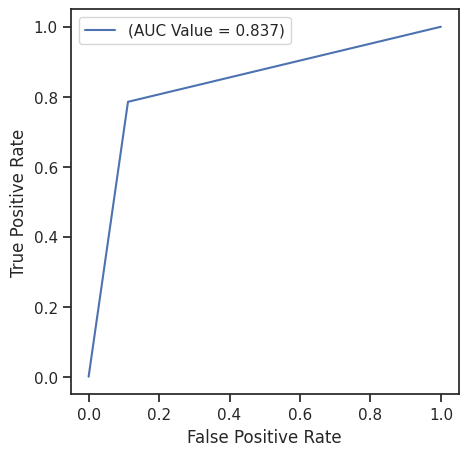


Confusion Matrix: 


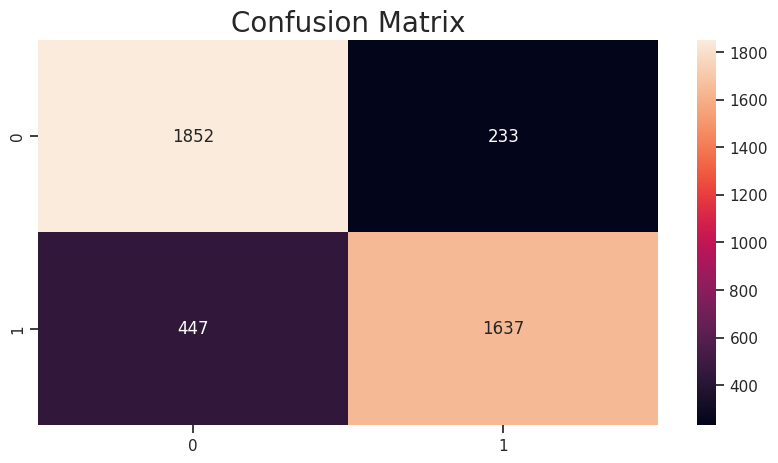

In [45]:
logreg_count = LogisticRegression()
print("Logistic Regression Model (Before Hyperparameter Tuning)")
print ("------------------")
result(logreg_count, "Logistic Regression ")

#Random Forest Classifier Model

Random Forest Classifier Model (Before Hyperparameter Tuning)
------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96      2085
           1       0.93      1.00      0.96      2084

    accuracy                           0.96      4169
   macro avg       0.96      0.96      0.96      4169
weighted avg       0.96      0.96      0.96      4169

----------------------------------------------------------------------------------------------------

Train Accuracy Score (Before HT):  1.0
----------------------------------------------------------------------------------------------------

Test Accuracy Score (Before HT):  0.9623410889901655
----------------------------------------------------------------------------------------------------

Precision Score (Before HT):  0.9330337078651686
----------------------------------------------------------------------------------------------------

Recall Score (Befo

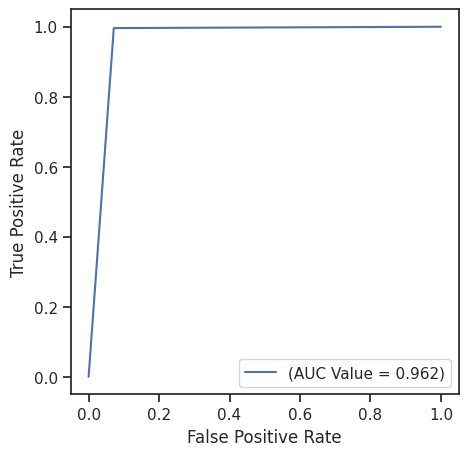


Confusion Matrix: 


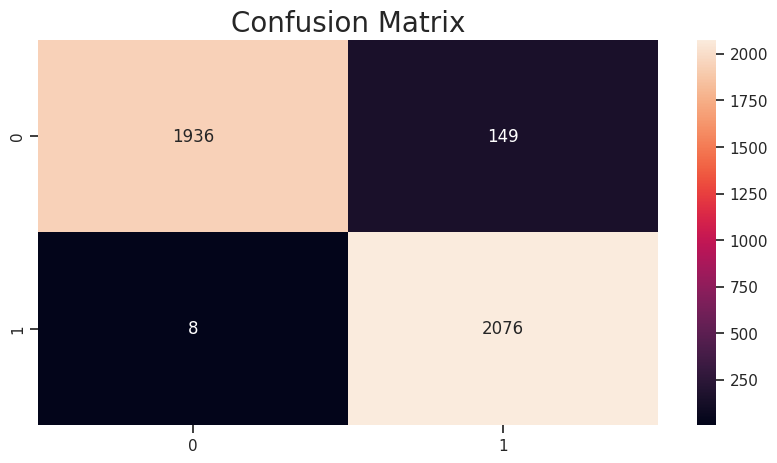

In [46]:
rf = RandomForestClassifier()
print("Random Forest Classifier Model (Before Hyperparameter Tuning)")
print ("------------------")
result(rf, "Random Forest")

#K Nearest Neighbours Model

K Nearest Neighbors Model (Before Hyperparameter Tuning)
------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      2085
           1       0.85      0.96      0.90      2084

    accuracy                           0.90      4169
   macro avg       0.90      0.90      0.89      4169
weighted avg       0.90      0.90      0.89      4169

----------------------------------------------------------------------------------------------------

Train Accuracy Score (Before HT):  0.9266566716641679
----------------------------------------------------------------------------------------------------

Test Accuracy Score (Before HT):  0.8954185656032622
----------------------------------------------------------------------------------------------------

Precision Score (Before HT):  0.8482671174978867
--------------------------------------------------------------------------

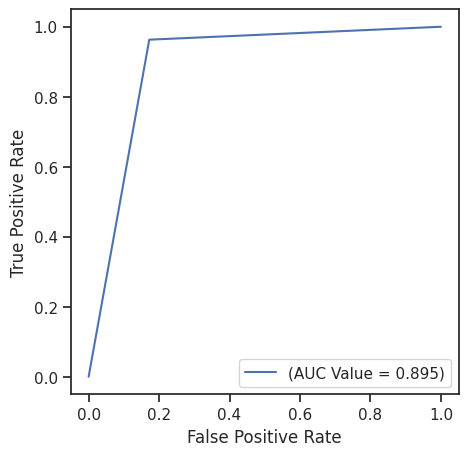


Confusion Matrix: 


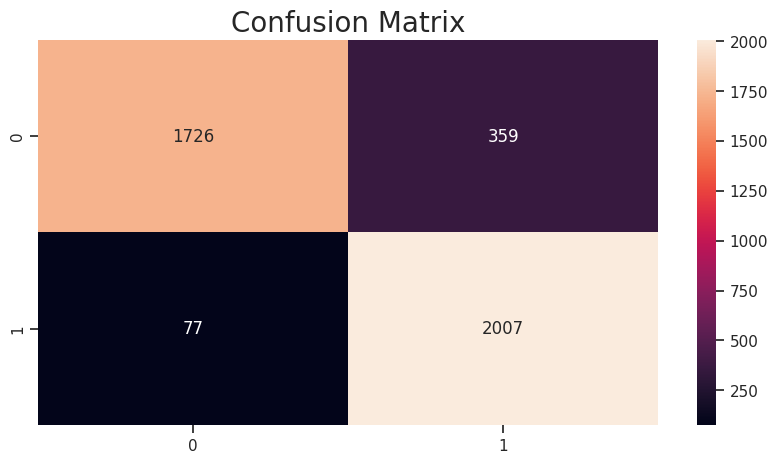

In [47]:
knn=KNeighborsClassifier()
print("K Nearest Neighbors Model (Before Hyperparameter Tuning)")
print("------------------------------------------------------")
result(knn, "KNN Classifier ")

#Ada Boost Classifier Model

AdaBoost Classifier Model(Before Hyperparameter Tuning)
------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      2085
           1       0.87      0.84      0.85      2084

    accuracy                           0.86      4169
   macro avg       0.86      0.86      0.86      4169
weighted avg       0.86      0.86      0.86      4169

----------------------------------------------------------------------------------------------------

Train Accuracy Score (Before HT):  0.8486956521739131
----------------------------------------------------------------------------------------------------

Test Accuracy Score (Before HT):  0.857279923242984
----------------------------------------------------------------------------------------------------

Precision Score (Before HT):  0.8728092138207311
----------------------------------------------------------------------------------------------------

Recall Sco

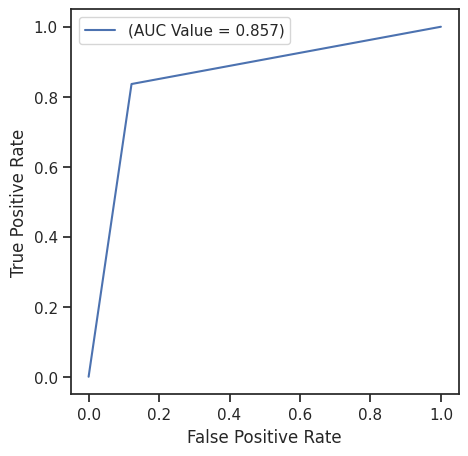


Confusion Matrix: 


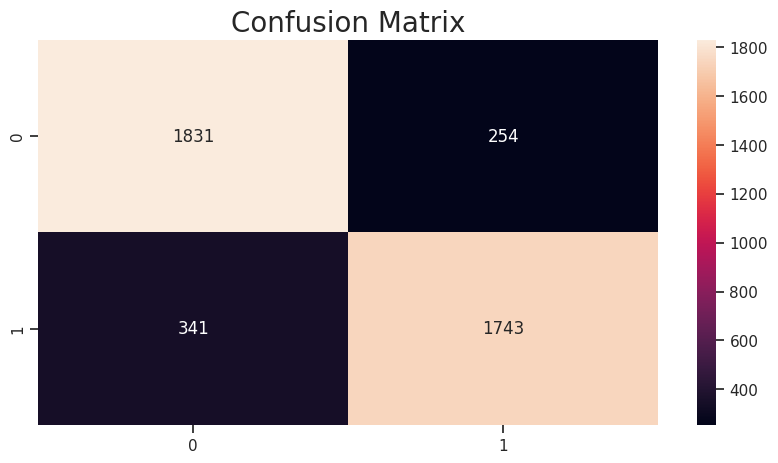

In [48]:
ada = AdaBoostClassifier()
print("AdaBoost Classifier Model(Before Hyperparameter Tuning)")
print("------------------")
result(ada, "ADA Boost")

#XG Boost Model

XGBoost Classifier Model(Before Hyperparameter Tuning)
------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      2085
           1       0.92      0.99      0.95      2084

    accuracy                           0.95      4169
   macro avg       0.95      0.95      0.95      4169
weighted avg       0.95      0.95      0.95      4169

----------------------------------------------------------------------------------------------------

Train Accuracy Score (Before HT):  0.9828485757121439
----------------------------------------------------------------------------------------------------

Test Accuracy Score (Before HT):  0.9513072679299592
----------------------------------------------------------------------------------------------------

Precision Score (Before HT):  0.9204291461779168
----------------------------------------------------------------------------------------------------

Recall Sco

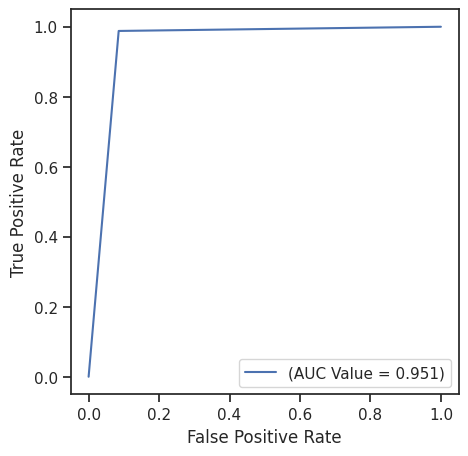


Confusion Matrix: 


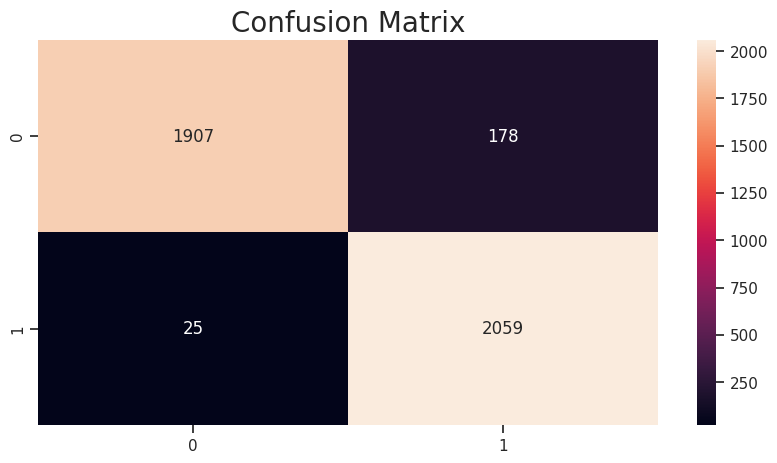

In [49]:
xg = XGBClassifier()
print("XGBoost Classifier Model(Before Hyperparameter Tuning)")
print("------------------")
result(xg, "XG Boost")

In [50]:
results_before_df = pd.DataFrame({
    'Model': model_names_bf,
    'Accuracy (Before HT)': accuracy_list_before,
    'Precision (Before HT)': precision_list_before,
    'Recall (Before HT)': recall_list_before,
    'F1 Score (Before HT)': f1_list_before,
    'ROC AUC (Before HT)': roc_auc_list_before
})
print("\nResults Table (Before Hyperparameter Tuning):")
results_before_df


Results Table (Before Hyperparameter Tuning):


Model  Accuracy (Before HT)  Precision (Before HT)  \
0  Logistic Regression               0.836891               0.875401   
1         Random Forest              0.962341               0.933034   
2       KNN Classifier               0.895419               0.848267   
3             ADA Boost              0.857280               0.872809   
4              XG Boost              0.951307               0.920429   

   Recall (Before HT)  F1 Score (Before HT)  ROC AUC (Before HT)  
0            0.785509              0.828022             0.836879  
1            0.996161              0.963565             0.962349  
2            0.963052              0.902022             0.895435  
3            0.836372              0.854202             0.857275  
4            0.988004              0.953020             0.951316

#HyperParameter Tunning

#Ada Boost Classifier

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters (AdaBoost Classifier): {'learning_rate': 1.0, 'n_estimators': 500, 'random_state': 0}
AdaBoost Classifier(After Hyperparameter Tuning)
------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      2085
           1       0.87      0.85      0.86      2084

    accuracy                           0.86      4169
   macro avg       0.86      0.86      0.86      4169
weighted avg       0.86      0.86      0.86      4169

----------------------------------------------------------------------------------------------------

Train Accuracy Score (After HT):  0.8624287856071964
----------------------------------------------------------------------------------------------------

Test Accuracy Score (After HT):  0.8623171024226434
----------------------------------------------------------------------------------------------------



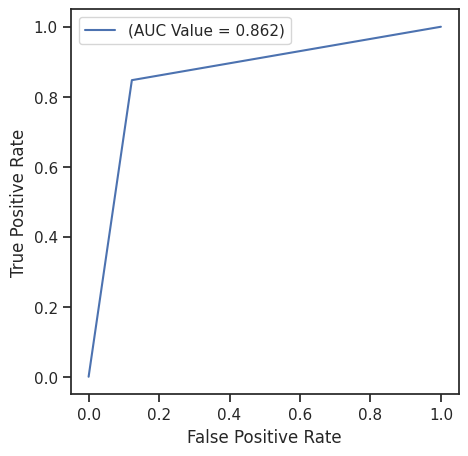


Confusion Matrix: 


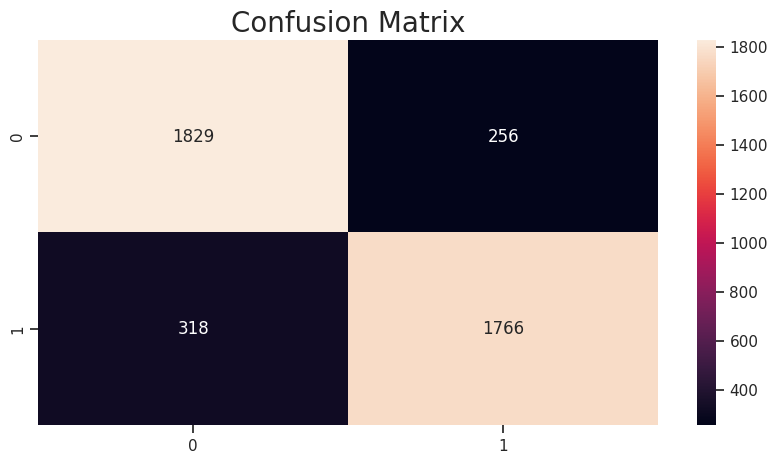

In [51]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 1.0],
    'random_state' : [0,15,42]
}

ada = AdaBoostClassifier()
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters (AdaBoost Classifier):", best_params)
best_ada_model = grid_search.best_estimator_
print("AdaBoost Classifier(After Hyperparameter Tuning)")
print("------------------")
result(best_ada_model, "ADA Boost", before_tuning=False)

#XG Boost Classifier

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters (XGBoost Classifier): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
XGBoost Classifier(After Hyperparameter Tuning)
------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      2085
           1       0.92      0.99      0.96      2084

    accuracy                           0.96      4169
   macro avg       0.96      0.96      0.96      4169
weighted avg       0.96      0.96      0.96      4169

----------------------------------------------------------------------------------------------------

Train Accuracy Score (After HT):  0.992503748125937
----------------------------------------------------------------------------------------------------

Test Accuracy Score (After HT):  0.955624850083953
-------------------------------------------------------------------------------------------

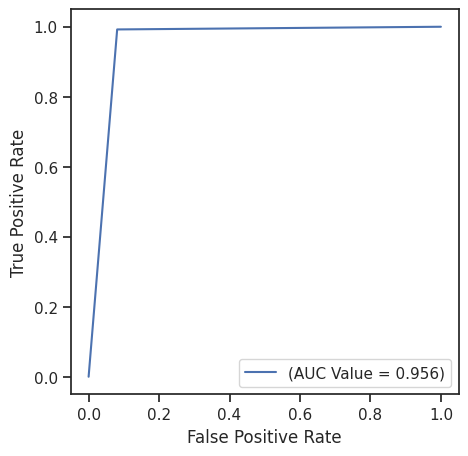


Confusion Matrix: 


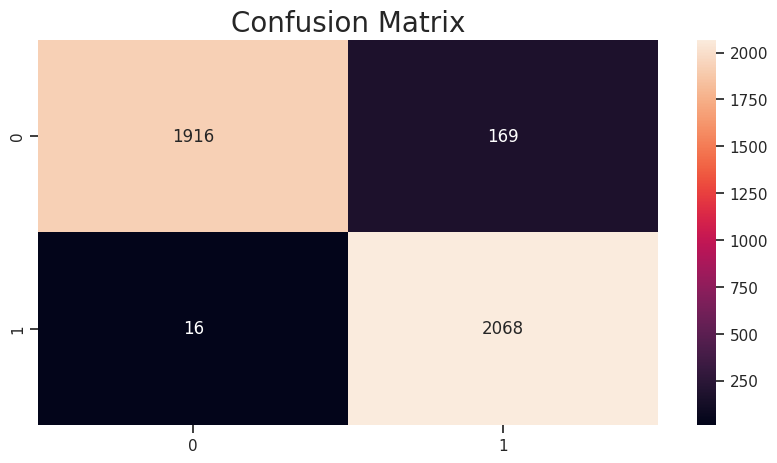

In [52]:
param_grid = {

    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8,0.9,1.0],

}

grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters (XGBoost Classifier):", best_params)
best_xg_model = grid_search.best_estimator_
print("XGBoost Classifier(After Hyperparameter Tuning)")
print("------------------")
result(best_xg_model, "XG Boost", before_tuning=False)

#Logistic Regression Model

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best Hyperparameters (Logistic Regression): {'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}
Logistic Regression Model (After Hyperparameter Tuning)
------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      2085
           1       0.88      0.79      0.83      2084

    accuracy                           0.84      4169
   macro avg       0.84      0.84      0.84      4169
weighted avg       0.84      0.84      0.84      4169

----------------------------------------------------------------------------------------------------

Train Accuracy Score (After HT):  0.8350224887556222
----------------------------------------------------------------------------------------------------

Test Accuracy Score (After HT):  0.8376109378747901
----------------------------------------------------------------------------------------------------

Precision Score (After HT):  0.8760021378941742
------------------------

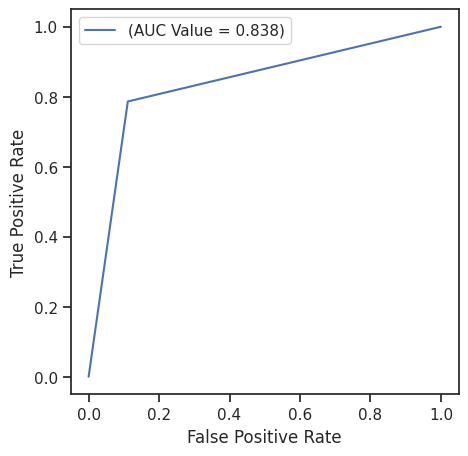


Confusion Matrix: 


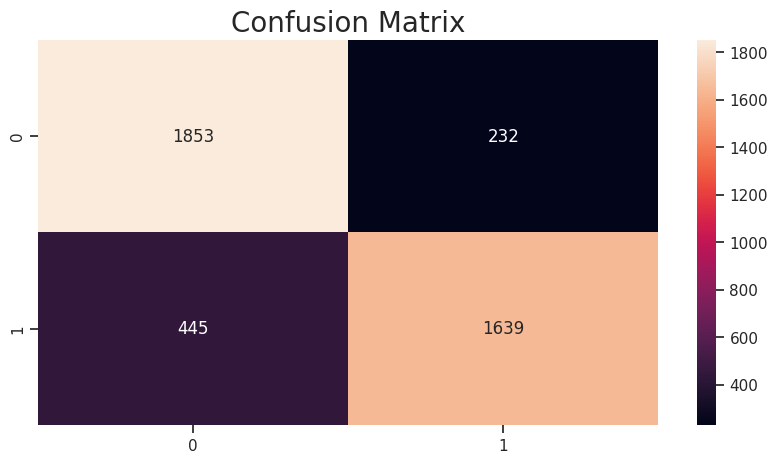

In [53]:
# Example usage with Logistic Regression
param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],'max_iter': [100, 200, 300]
}

best_lr = GridSearchCV(logreg_count, param_grid_lr, cv=5, verbose=1, n_jobs=-1)
best_lr.fit(x_train, y_train)
best_params = best_lr.best_params_
print("Best Hyperparameters (Logistic Regression):", best_params)
best_lr_model = best_lr.best_estimator_
print("Logistic Regression Model (After Hyperparameter Tuning)")
print("------------------")
result(best_lr_model, "Logistic Regression ", before_tuning=False)


#K Nearest Neighbours Model

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Hyperparameters (KNN Classifier): {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
K Nearest Neighbors Classifier (After Hyperparameter Tuning)
------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      2085
           1       0.92      0.99      0.96      2084

    accuracy                           0.95      4169
   macro avg       0.96      0.95      0.95      4169
weighted avg       0.96      0.95      0.95      4169

----------------------------------------------------------------------------------------------------

Train Accuracy Score (After HT):  1.0
----------------------------------------------------------------------------------------------------

Test Accuracy Score (After HT):  0.9541856560326217
----------------------------------------------------------------------------------------------------

Precision Score (After

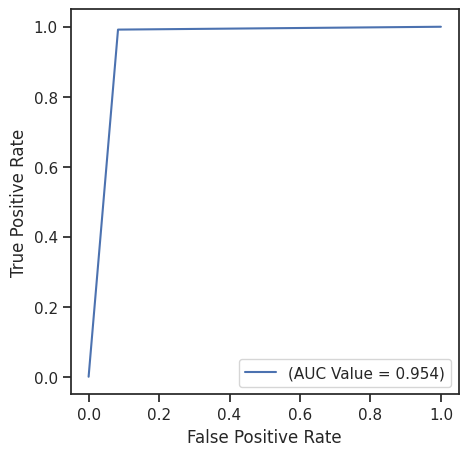


Confusion Matrix: 


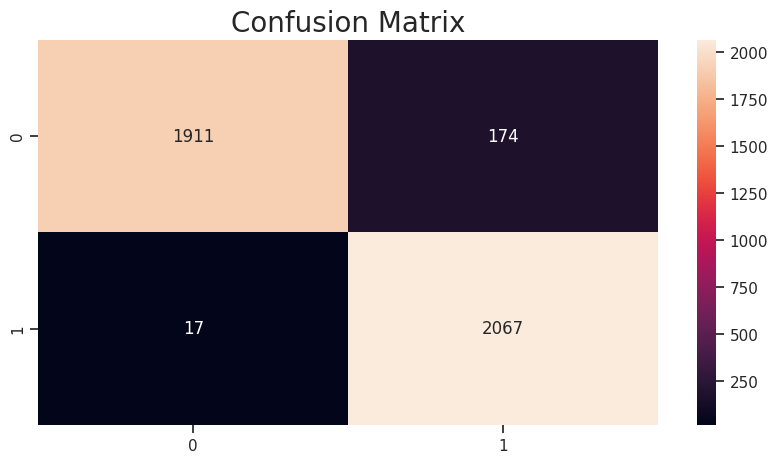

In [54]:
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9,13,15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

best_knn = GridSearchCV(knn, param_grid_knn, cv=5, verbose=1, n_jobs=-1)
best_knn.fit(x_train, y_train)
best_params = best_knn.best_params_
print("Best Hyperparameters (KNN Classifier):", best_params)
best_knn_model = best_knn.best_estimator_
print("K Nearest Neighbors Classifier (After Hyperparameter Tuning)")
print("------------------")
result(best_knn_model, "KNN Classifier ", before_tuning=False)

#Random Forest Classifier Model

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters (Random Forest Classifier): {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Random Forest Classifier Model (After Hyperparameter Tuning)
----------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      2085
           1       0.95      1.00      0.97      2084

    accuracy                           0.97      4169
   macro avg       0.97      0.97      0.97      4169
weighted avg       0.97      0.97      0.97      4169

----------------------------------------------------------------------------------------------------

Train Accuracy Score (After HT):  0.9991004497751125
----------------------------------------------------------------------------------------------------

Test Accuracy Score (After HT):  0.9688174622211562
--

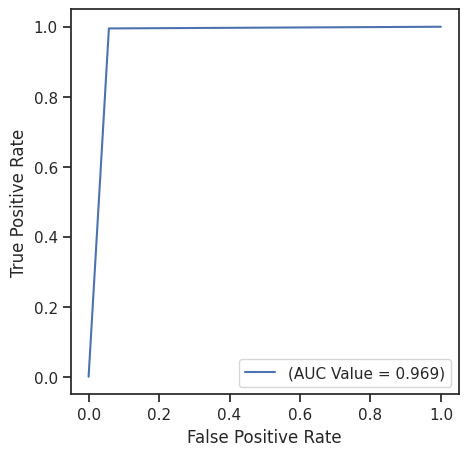


Confusion Matrix: 


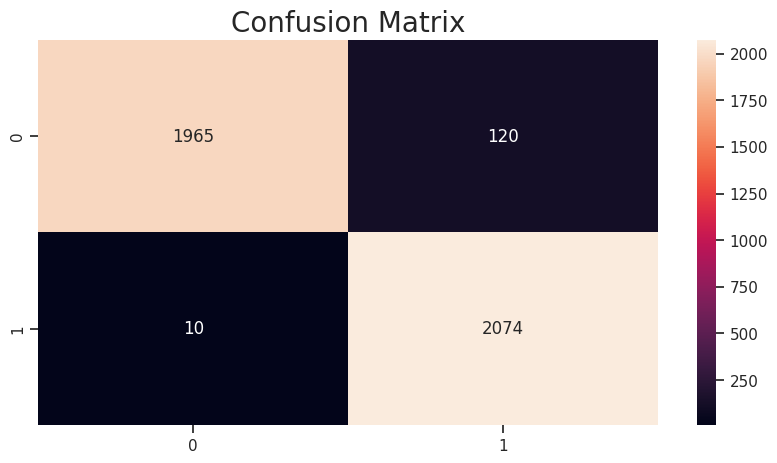

In [55]:
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

best_rf = GridSearchCV(rf, param_grid_rf, cv=5, verbose=1, n_jobs=-1)
best_rf.fit(x_train, y_train)
best_params = best_rf.best_params_
print("Best Hyperparameters (Random Forest Classifier):", best_params)
best_rf_model = best_rf.best_estimator_
print("Random Forest Classifier Model (After Hyperparameter Tuning)")
print("----------------------------------------------------------")
result(best_rf_model, "Random Forest", before_tuning=False)

In [56]:
# Create separate DataFrames for results before and after hyperparameter tuning


results_after_df = pd.DataFrame({
    'Model': model_names_af,
    'Accuracy (After HT)': accuracy_list_after,
    'Precision (After HT)': precision_list_after,
    'Recall (After HT)': recall_list_after,
    'F1 Score (After HT)': f1_list_after,
    'ROC AUC (After HT)': roc_auc_list_after
})

# Print the results tables

print("\nResults Table (After Hyperparameter Tuning):")
results_after_df


Results Table (After Hyperparameter Tuning):


Model  Accuracy (After HT)  Precision (After HT)  \
0             ADA Boost             0.862317              0.873393   
1              XG Boost             0.955625              0.924452   
2  Logistic Regression              0.837611              0.876002   
3       KNN Classifier              0.954186              0.922356   
4         Random Forest             0.968817              0.945305   

   Recall (After HT)  F1 Score (After HT)  ROC AUC (After HT)  
0           0.847409             0.860205            0.862314  
1           0.992322             0.957186            0.955634  
2           0.786468             0.828824            0.837599  
3           0.991843             0.955838            0.954195  
4           0.995202             0.969612            0.968824

In [57]:
# Merge the two DataFrames on the 'Model' column
combined_results_df = pd.merge(results_before_df, results_after_df, on='Model', suffixes=('_Before_HT', '_After_HT'))

# Reorder the columns to group accuracy and precision together
combined_results_df = combined_results_df[
    ['Model',
     'Accuracy (Before HT)', 'Accuracy (After HT)',
     'Precision (Before HT)', 'Precision (After HT)',
     'Recall (Before HT)', 'Recall (After HT)',
     'F1 Score (Before HT)', 'F1 Score (After HT)',
     'ROC AUC (Before HT)', 'ROC AUC (After HT)']
]

# Print the combined results table
print("\nCombined Results Table:")
combined_results_df



Combined Results Table:


Model  Accuracy (Before HT)  Accuracy (After HT)  \
0  Logistic Regression               0.836891             0.837611   
1         Random Forest              0.962341             0.968817   
2       KNN Classifier               0.895419             0.954186   
3             ADA Boost              0.857280             0.862317   
4              XG Boost              0.951307             0.955625   

   Precision (Before HT)  Precision (After HT)  Recall (Before HT)  \
0               0.875401              0.876002            0.785509   
1               0.933034              0.945305            0.996161   
2               0.848267              0.922356            0.963052   
3               0.872809              0.873393            0.836372   
4               0.920429              0.924452            0.988004   

   Recall (After HT)  F1 Score (Before HT)  F1 Score (After HT)  \
0           0.786468              0.828022             0.828824   
1           0.995202              0.963565             0.969612   
2           0.991843              0.902022             0.955838   
3           0.847409              0.854202             0.860205   
4           0.992322              0.953020             0.957186   

   ROC AUC (Before HT)  ROC AUC (After HT)  
0             0.836879            0.837599  
1             0.962349            0.968824  
2             0.895435            0.954195  
3             0.857275            0.862314  
4             0.951316            0.955634

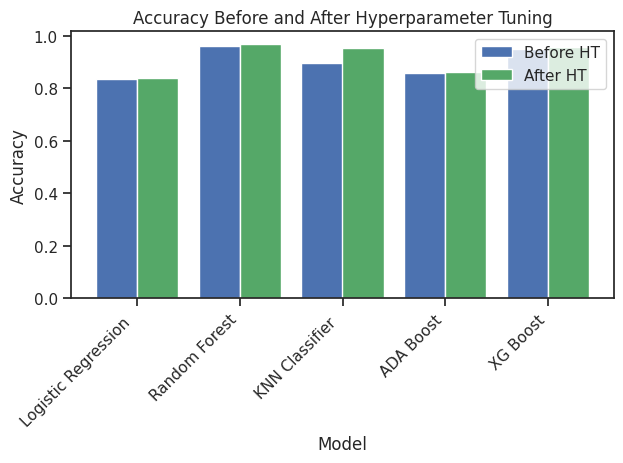

In [58]:
import matplotlib.pyplot as plt

# Extract accuracy scores from the combined results table
model_names = combined_results_df['Model']
accuracy_before = combined_results_df['Accuracy (Before HT)']
accuracy_after = combined_results_df['Accuracy (After HT)']

# Create positions for the bars
x = range(len(model_names))

# Set the width of the bars
bar_width = 0.4

# Create a bar plot for accuracy before tuning
plt.bar(x, accuracy_before, width=bar_width, label='Before HT', color='b')

# Create a bar plot for accuracy after tuning
plt.bar([i + bar_width for i in x], accuracy_after, width=bar_width, label='After HT', color='g')

# Set the x-axis labels to be the model names
plt.xticks([i + bar_width / 2 for i in x], model_names, rotation=45, ha='right')

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Hyperparameter Tuning')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()




Based on our analysis, we observed varying levels of performance among different classification models for revenue prediction:

1. Random Forest Classifier showed the highest accuracy, achieving an impressive 96.8% accuracy for revenue classification before hyperparameter tuning.

2. After hyperparameter tuning, we noted some improvements in the performance of Ada Boost and XG Boost, although these improvements were not as significant as with other models.

3. Notably, K-Nearest Neighbors (KNN) demonstrated remarkable enhancement in accuracy after hyperparameter tuning, increasing from an initial accuracy of 89% to an impressive 95.4%.

4. On the contrary, Logistic Regression did not perform as well as the other models, yielding an accuracy of 82% both before and after hyperparameter tuning.

In summary, our analysis highlights the effectiveness of Random Forest Classifier and the substantial impact of hyperparameter tuning, particularly for K-Nearest Neighbors, in improving revenue classification accuracy. However, Logistic Regression did not exhibit the same level of performance compared to the ensemble methods and gradient boosting algorithms.



